In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

## **1. Data Exploration and Preprocessing** 


#### **-> Loading Dataset**

In [9]:
df = pd.read_csv("CC GENERAL.csv")
print("Shape of data:", df.shape)

Shape of data: (8950, 18)


#### **-> Dataset Exploration**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


#### **-> Drop ID Column** (not used for clustering)

In [12]:
df.drop('CUST_ID', axis=1, inplace=True)

#### **-> Handling Missing Values**

In [13]:
# CREDIT_LIMIT has only 1 missing → drop that row
df = df[df['CREDIT_LIMIT'].notnull()]
# MINIMUM_PAYMENTS has more → fill with median
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

#### **-> Exploring Distribution of Data Features**

In [14]:
print("\nStatistical Summary:\n")
df.describe()


Statistical Summary:



BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8949.000000        8949.000000   8949.000000       8949.000000   
mean    1564.647593           0.877350   1003.316936        592.503572   
std     2081.584016           0.236798   2136.727848       1659.968851   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.365782           0.888889     39.800000          0.000000   
50%      873.680279           1.000000    361.490000         38.000000   
75%     2054.372848           1.000000   1110.170000        577.830000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean               411.113579    978.959616             0.490405   
std                904.378205   2097.264344             0.401360   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.650000   1113.868654             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                     0.202480                          0.364478   
std                      0.298345                          0.397451   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                 0.135141          3.249078      14.711476   4494.449450   
std                  0.200132          6.824987      24.858552   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8949.000000       8949.000000       8949.000000  8949.000000  
mean    1733.336511        845.003358          0.153732    11.517935  
std     2895.168146       2332.905284          0.292511     1.337134  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.282850        170.875613          0.000000    12.000000  
50%      857.062706        312.452292          0.000000    12.000000  
75%     1901.279320        788.721609          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

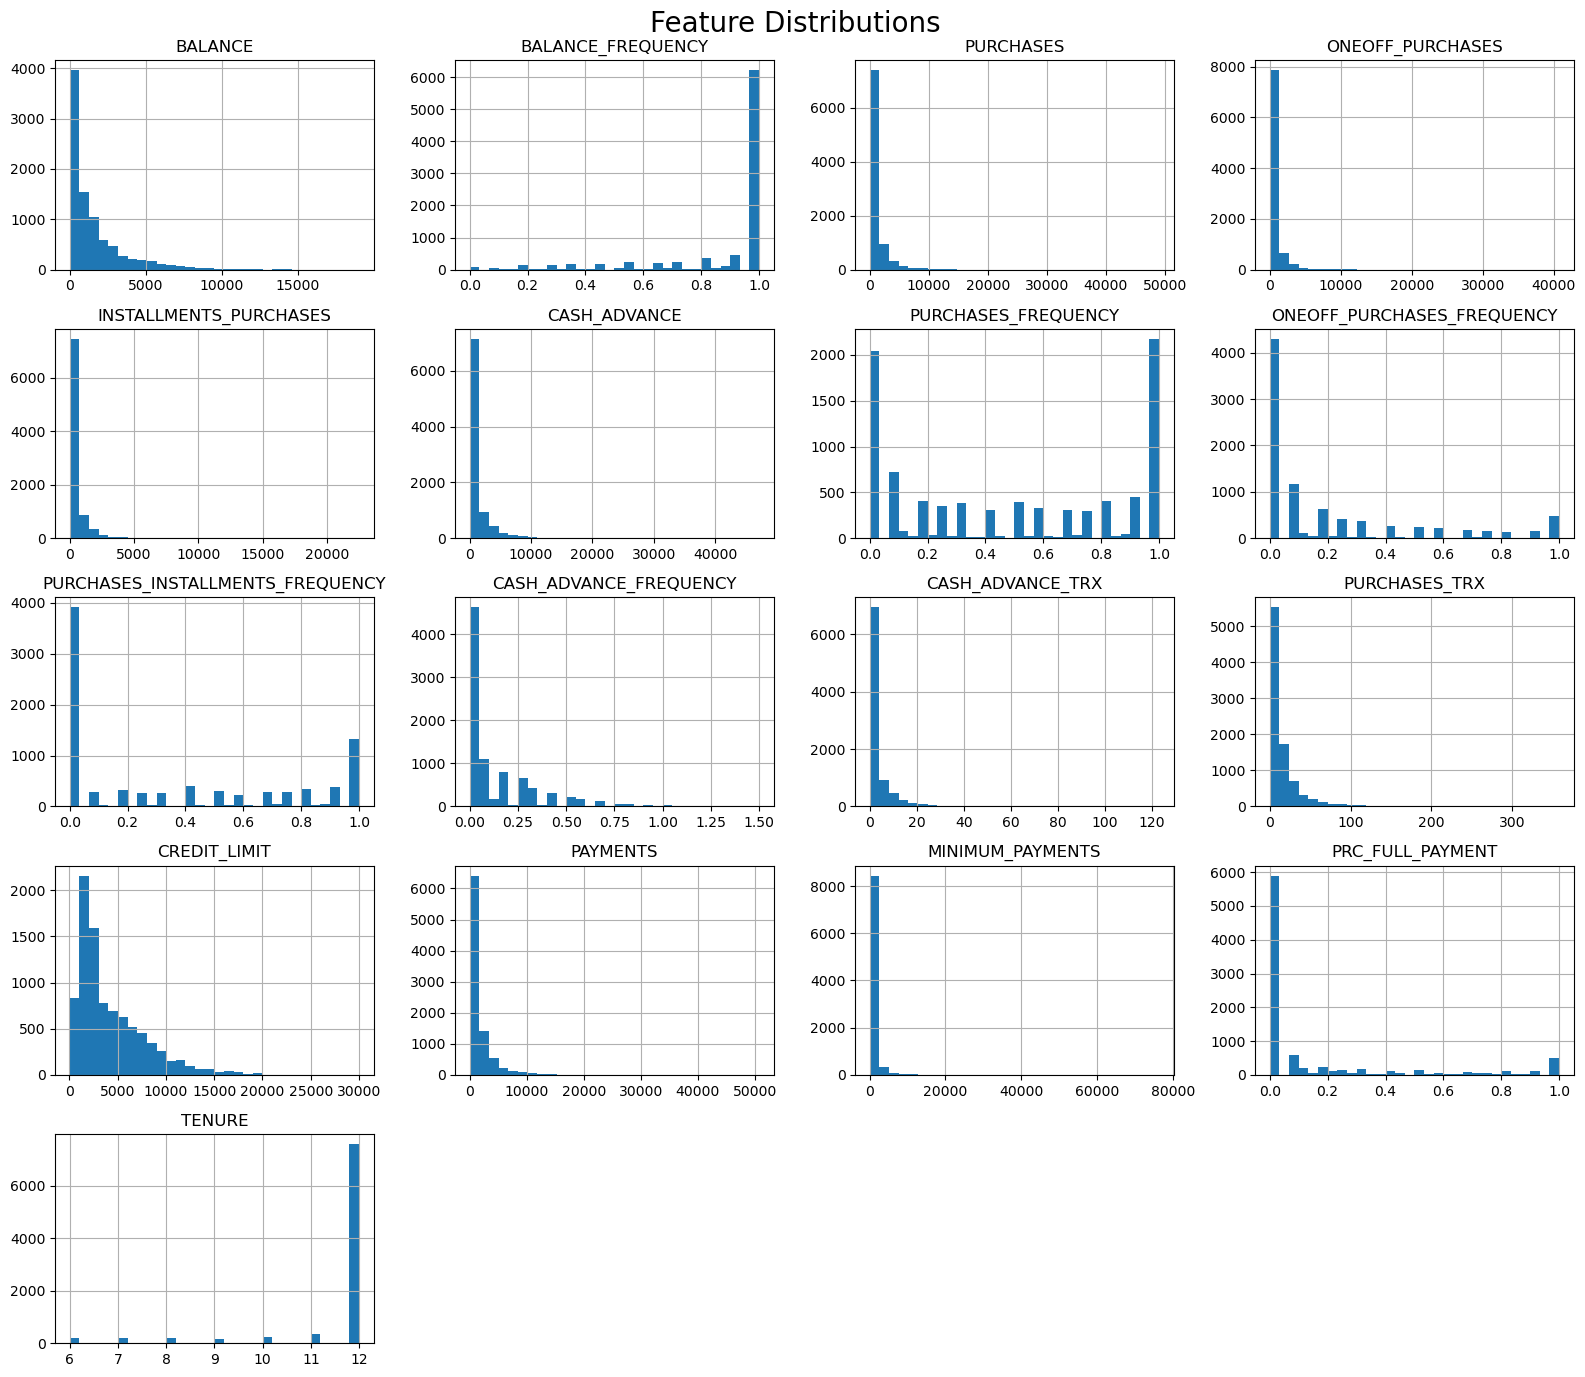

In [15]:
df.hist(figsize=(16, 14), bins=30)
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout()
plt.show()

#### **-> Exploring Correlation Between Features**

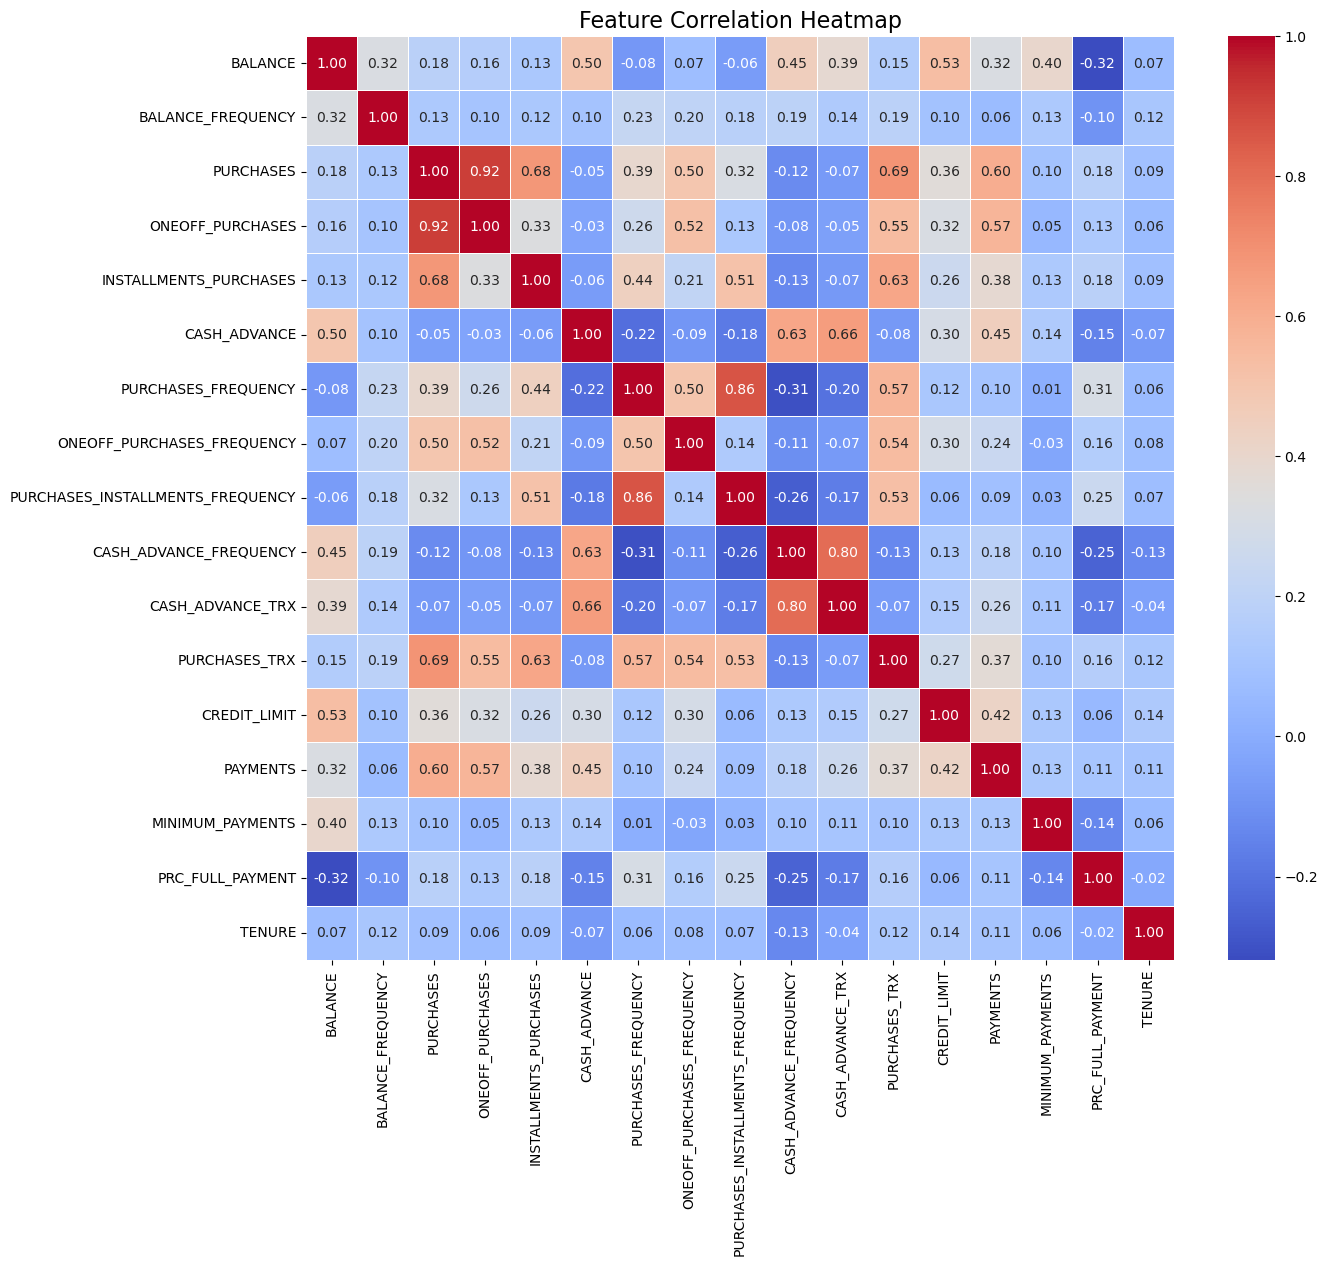

In [16]:
plt.figure(figsize=(14, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

#### **-> Feature Engineering** (Generating New Meaningful Features)

In [17]:
# Payment to Minimum Payment Ratio
df['PAYMENT_RATIO'] = df['PAYMENTS'] / (df['MINIMUM_PAYMENTS'] + 1e-5)
# One-off Purchase Ratio
df['ONEOFF_PURCHASE_RATIO'] = df['ONEOFF_PURCHASES'] / (df['PURCHASES'] + 1e-5)
# Installment Purchase Ratio
df['INSTALLMENT_PURCHASE_RATIO'] = df['INSTALLMENTS_PURCHASES'] / (df['PURCHASES'] + 1e-5)
# Cash Advance to Balance Ratio
df['CASH_ADVANCE_RATIO'] = df['CASH_ADVANCE'] / (df['BALANCE'] + 1e-5)
# Balance Utilization Ratio
df['UTILIZATION_RATIO'] = df['BALANCE'] / (df['CREDIT_LIMIT'] + 1e-5)
# Avg Purchase per Transaction
df['AVG_PURCHASE_TRX'] = df['PURCHASES'] / (df['PURCHASES_TRX'] + 1e-5)
# Avg Cash Advance per Transaction
df['AVG_CASHADVANCE_TRX'] = df['CASH_ADVANCE'] / (df['CASH_ADVANCE_TRX'] + 1e-5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT_LIMI

In [19]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0                0.000000  ...        139.509787          0.000000      12   
1                0.250000  ...       1072.340217          0.222222      12   
2                0.000000  ...        627.284787          0.000000      12   
3                0.083333  ...        312.452292          0.000000      12   
4                0.000000  ...        244.791237          0.000000      12   

   PAYMENT_RATIO  ONEOFF_PURCHASE_RATIO  INSTALLMENT_PURCHASE_RATIO  \
0       1.446508               0.000000                         1.0   
1       3.826241               0.000000                         0.0   
2       0.991682               1.000000                         0.0   
3       0.000000               1.000000                         0.0   
4       2.771074               0.999999                         0.0   

   CASH_ADVANCE_RATIO  UTILIZATION_RATIO  AVG_PURCHASE_TRX  \
0            0.000000           0.040901         47.699762   
1            2.011869           0.457495          0.000000   
2            0.000000           0.332687         64.430780   
3            0.123473           0.222223       1498.985010   
4            0.000000           0.681429         15.999840   

   AVG_CASHADVANCE_TRX  
0             0.000000  
1          1610.732344  
2             0.000000  
3           205.785959  
4             0.000000  

[5 rows x 24 columns]

#### **-> Dropping Redundant Columns**

In [20]:
redundant_cols = [
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'PURCHASES',
    'PURCHASES_TRX',
    'CASH_ADVANCE',
    'CASH_ADVANCE_TRX',
    'BALANCE',
    'CREDIT_LIMIT',
    'MINIMUM_PAYMENTS',
    'PAYMENTS'
]
df_selected = df.drop(columns=redundant_cols)
print("Remaining columns after dropping redundant ones:")
print(df_selected.columns)


Remaining columns after dropping redundant ones:
Index(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE', 'PAYMENT_RATIO',
       'ONEOFF_PURCHASE_RATIO', 'INSTALLMENT_PURCHASE_RATIO',
       'CASH_ADVANCE_RATIO', 'UTILIZATION_RATIO', 'AVG_PURCHASE_TRX',
       'AVG_CASHADVANCE_TRX'],
      dtype='object')


In [21]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8949 non-null   float64
 1   PURCHASES_FREQUENCY               8949 non-null   float64
 2   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 3   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 4   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 5   PRC_FULL_PAYMENT                  8949 non-null   float64
 6   TENURE                            8949 non-null   int64  
 7   PAYMENT_RATIO                     8949 non-null   float64
 8   ONEOFF_PURCHASE_RATIO             8949 non-null   float64
 9   INSTALLMENT_PURCHASE_RATIO        8949 non-null   float64
 10  CASH_ADVANCE_RATIO                8949 non-null   float64
 11  UTILIZATION_RATIO                 8949 non-null   float64
 12  AVG_PURCHAS

#### **-> Checking the Distribution of New Features**

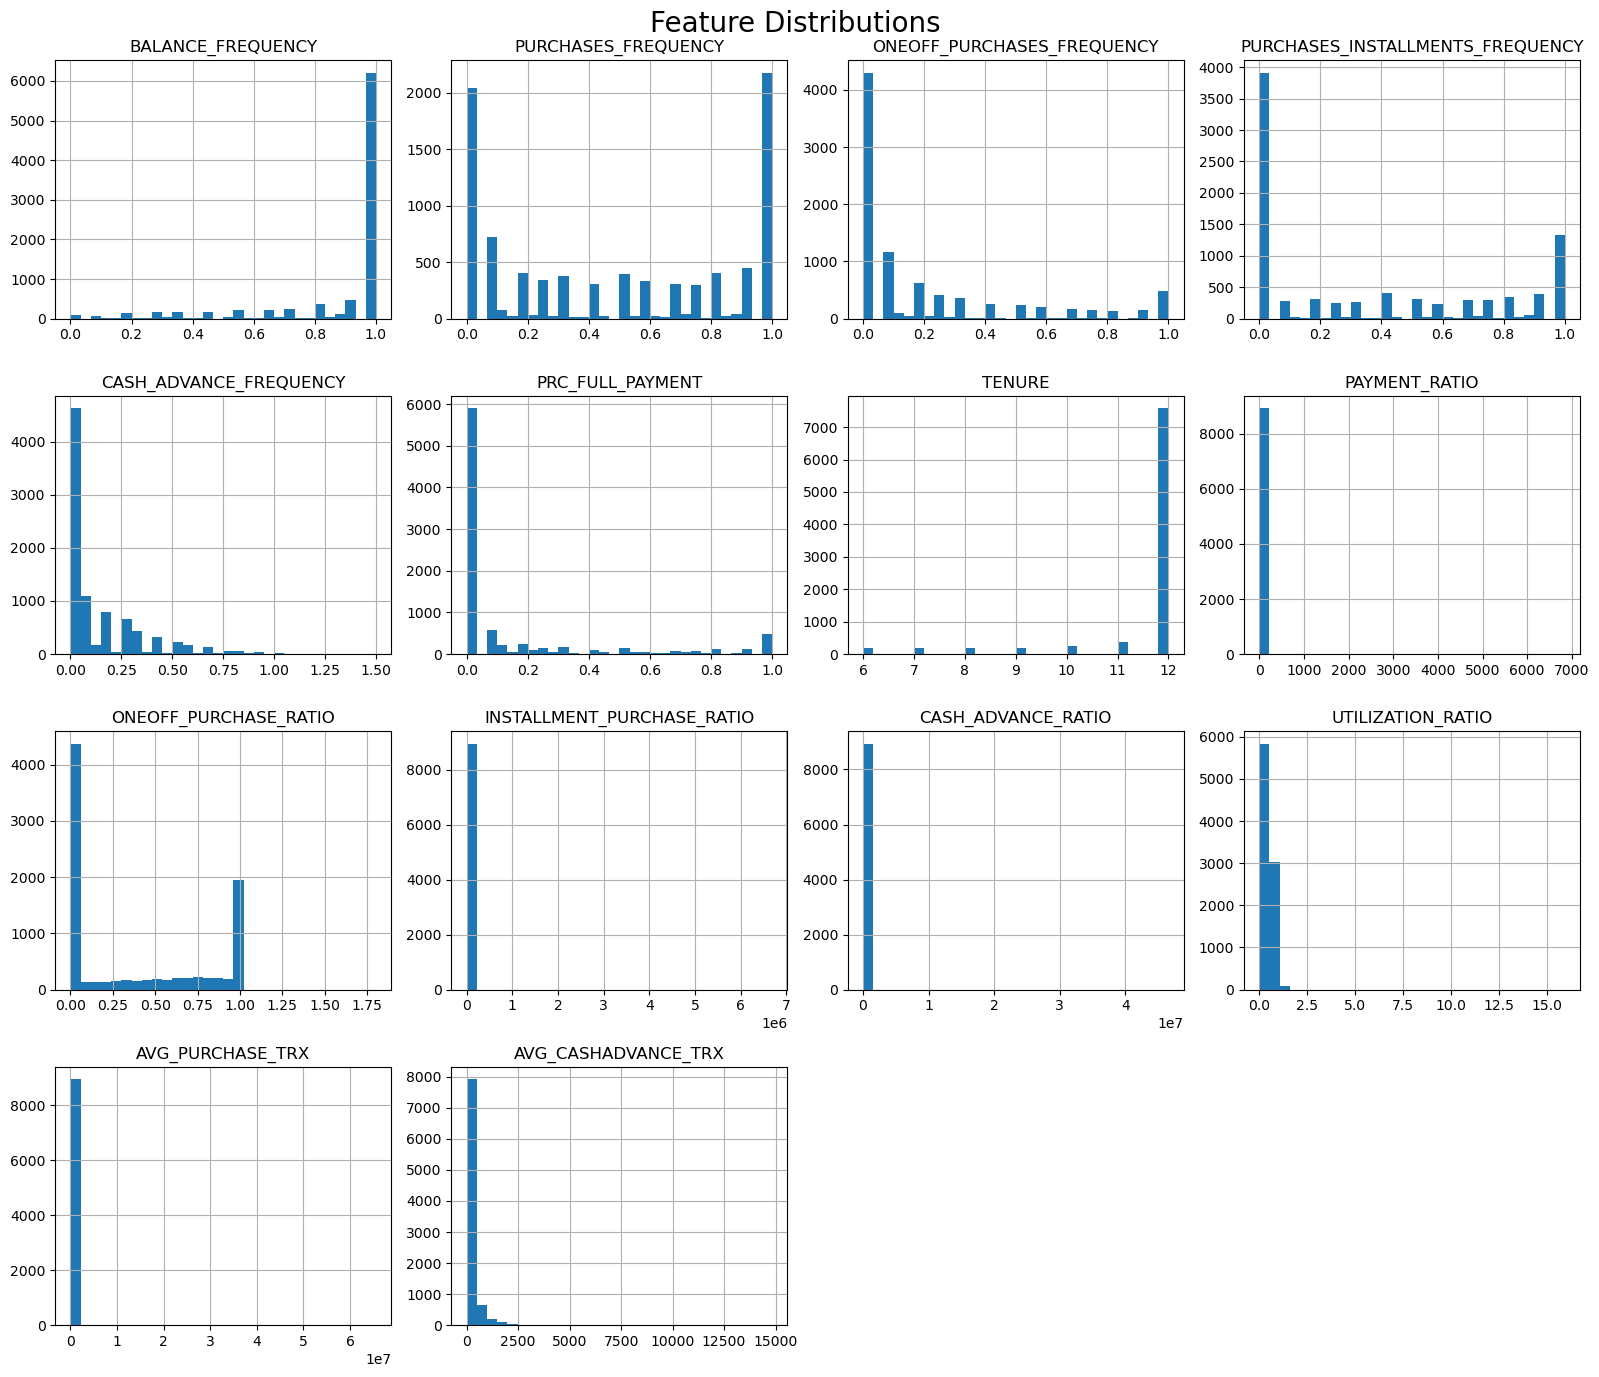

In [22]:
df_selected.hist(figsize=(16, 14), bins=30)
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout()
plt.show()

#### **-> Checking the Correlation of New Features**

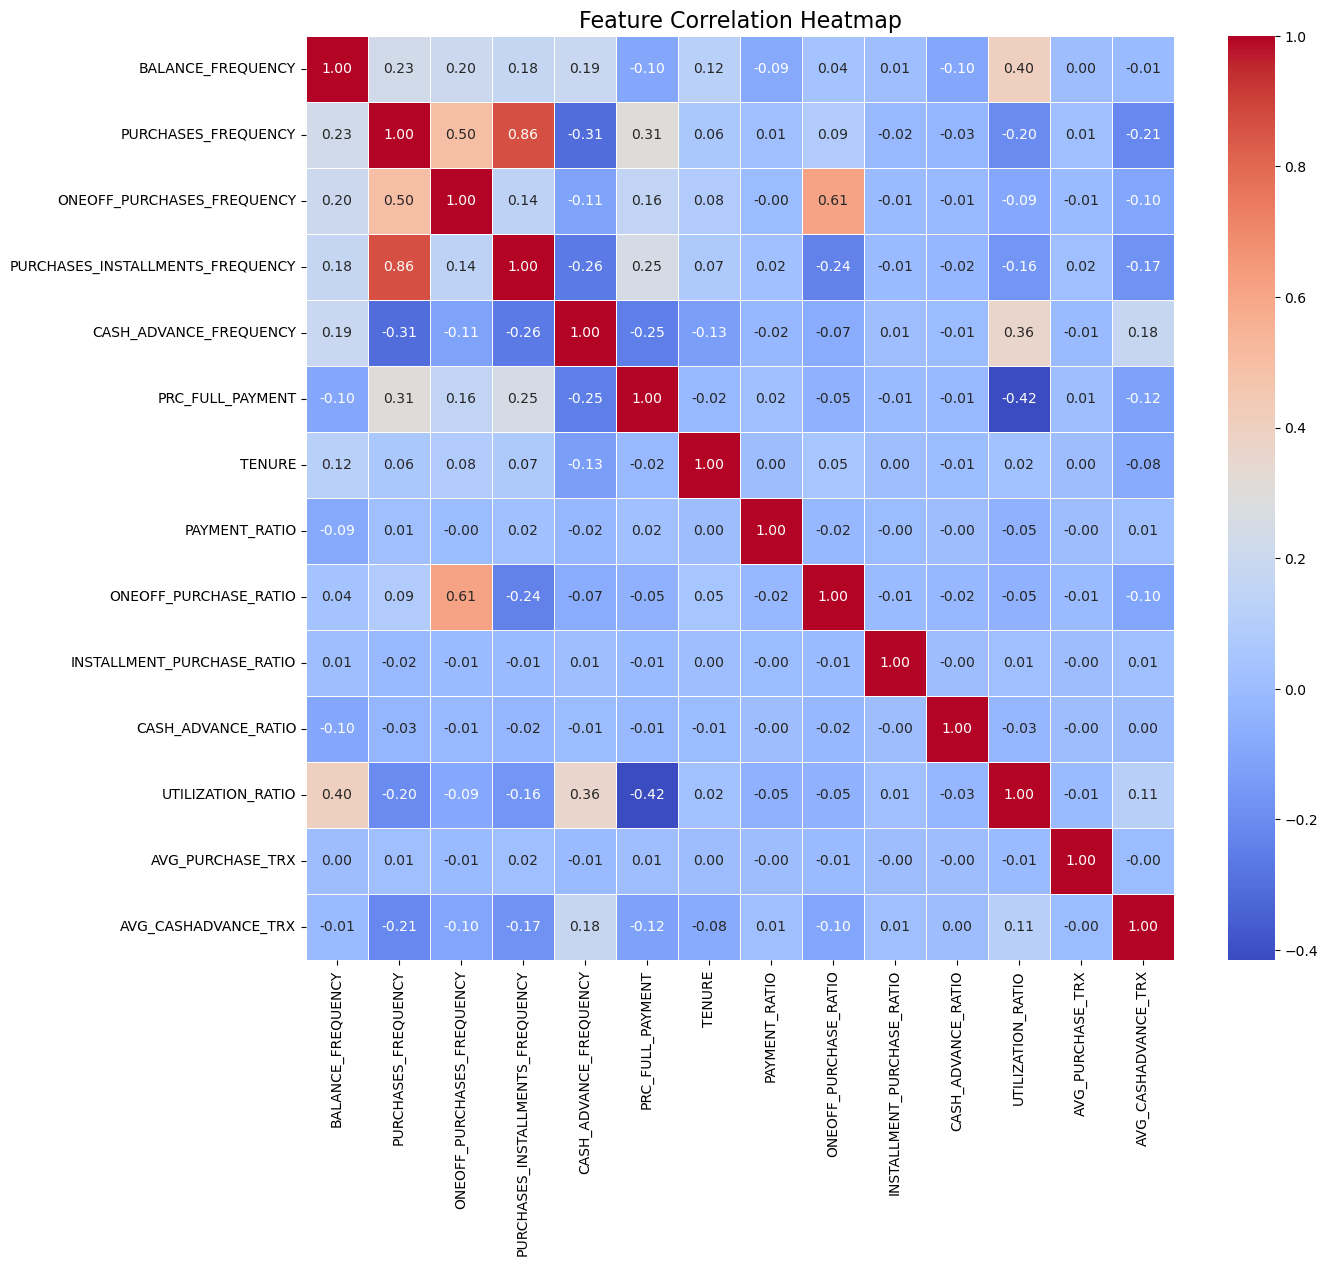

In [23]:
plt.figure(figsize=(14, 12))
corr_matrix = df_selected.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

#### **-> Apply Log Transformation to Reduce Skewness**

In [24]:
# Columns with heavy right skew
skewed_cols = [
    'PAYMENT_RATIO', 'ONEOFF_PURCHASE_RATIO', 'INSTALLMENT_PURCHASE_RATIO',
    'CASH_ADVANCE_RATIO', 'UTILIZATION_RATIO',
    'AVG_PURCHASE_TRX', 'AVG_CASHADVANCE_TRX'
]

# Apply log1p transformation to handle 0s and reduce skew
for col in skewed_cols:
    df_selected[col] = np.log1p(df_selected[col])


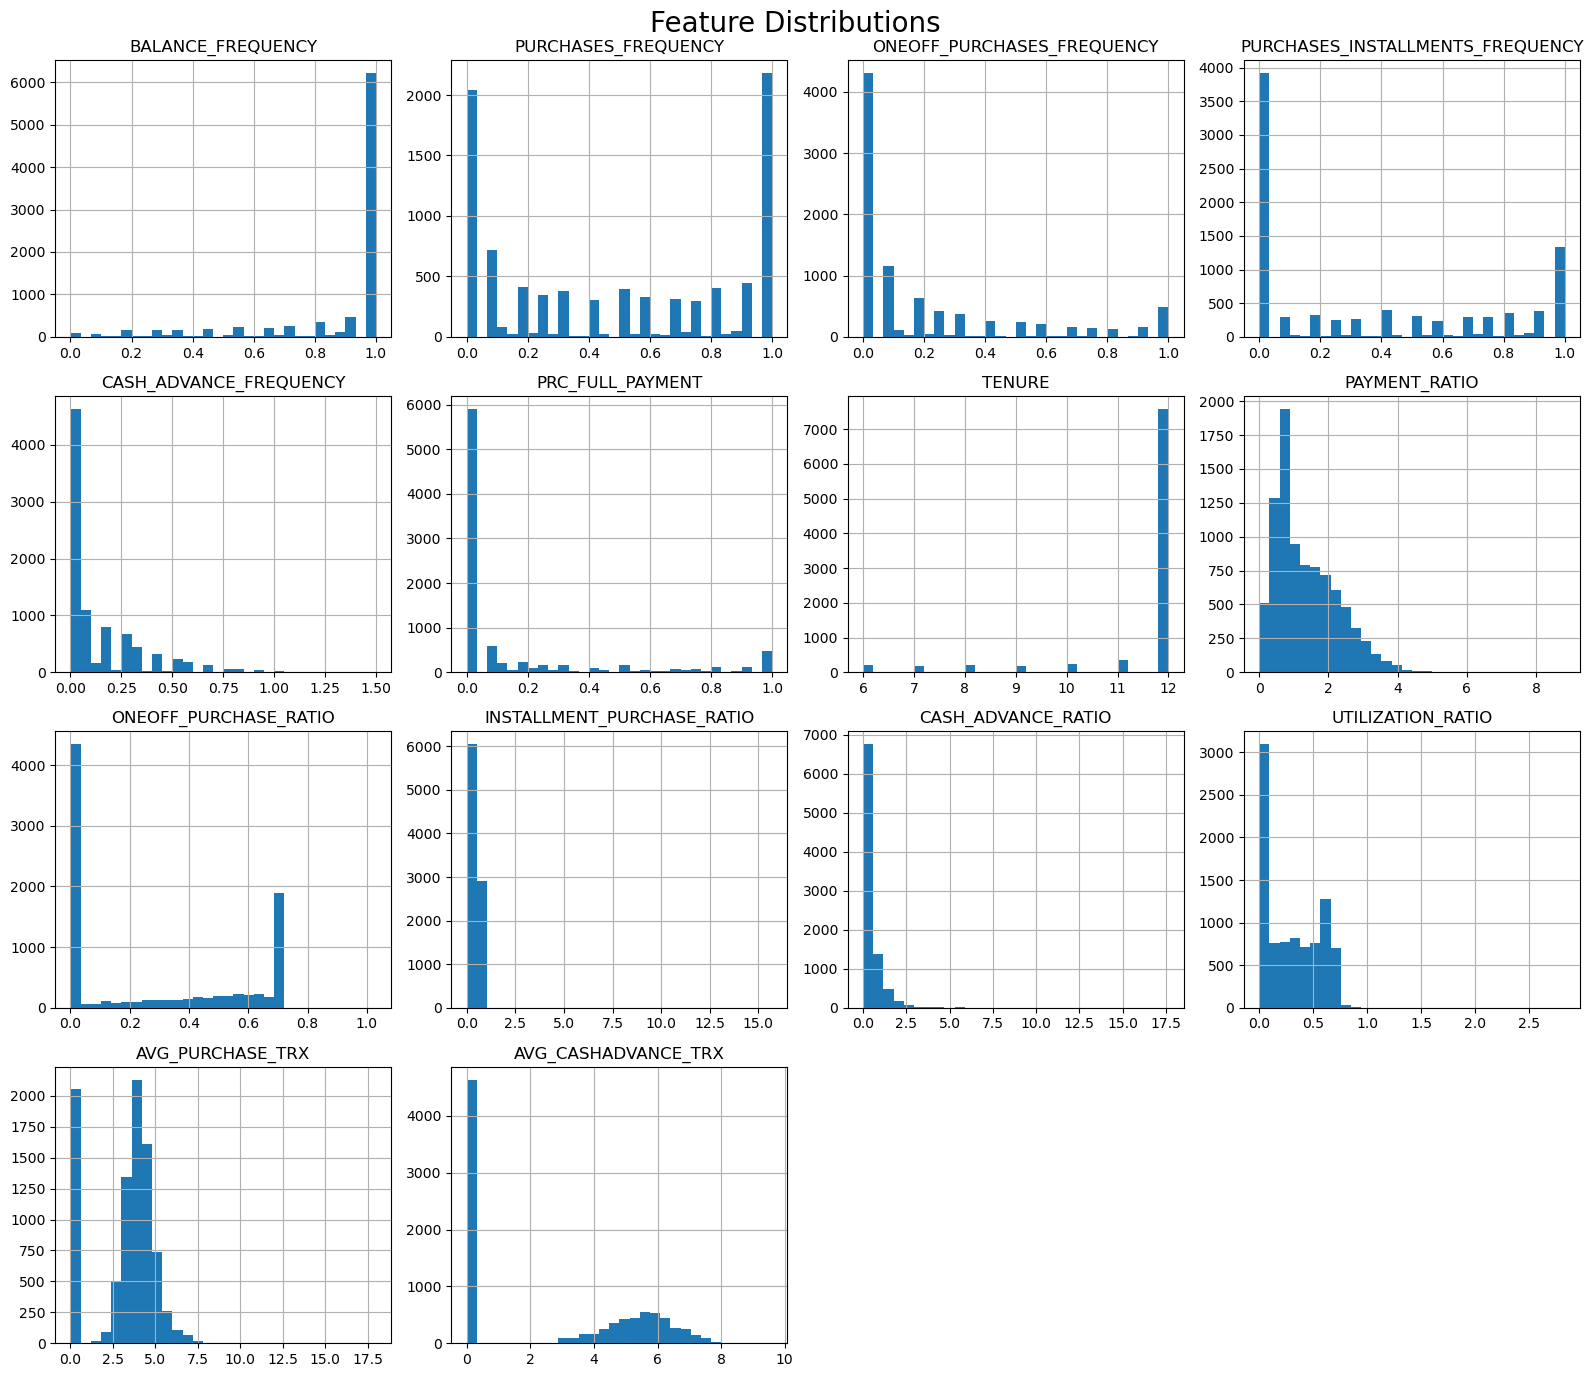

In [25]:
df_selected.hist(figsize=(16, 14), bins=30)
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout()
plt.show()

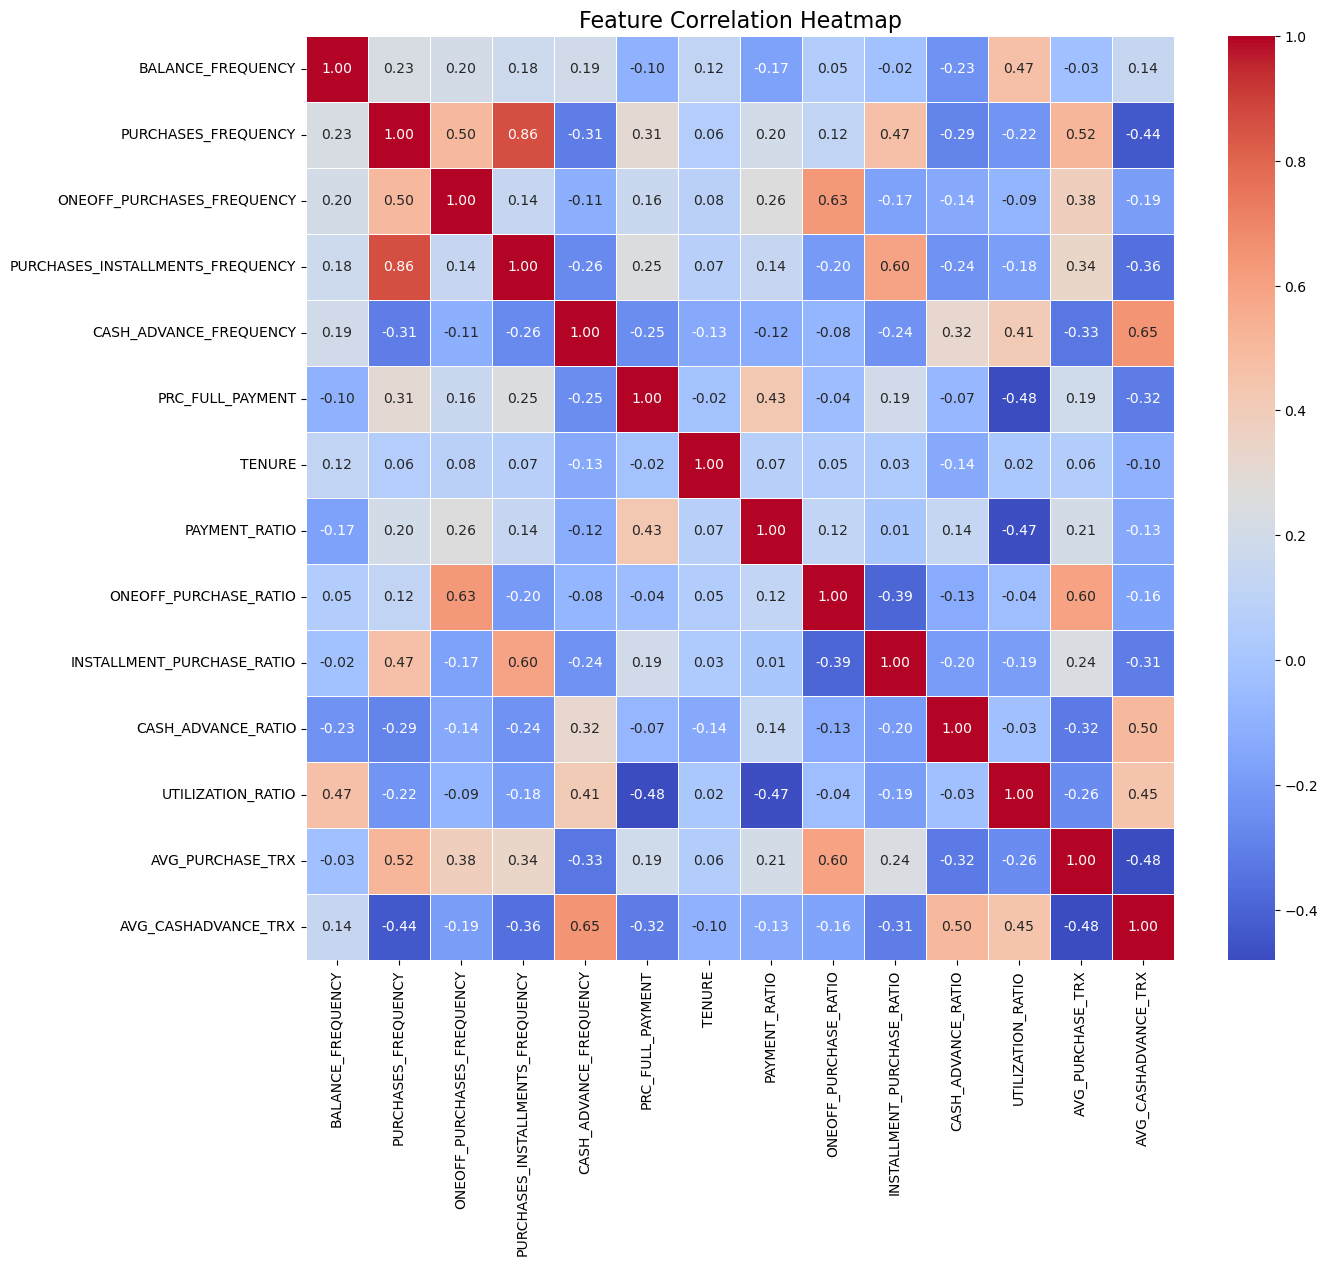

In [26]:
plt.figure(figsize=(14, 12))
corr_matrix = df_selected.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

#### **-> Dropping columns due to high correlation**

Dropped 'PURCHASES_INSTALLMENTS_FREQUENCY'. Remaining columns:
Index(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'PRC_FULL_PAYMENT', 'TENURE', 'PAYMENT_RATIO', 'ONEOFF_PURCHASE_RATIO',
       'INSTALLMENT_PURCHASE_RATIO', 'CASH_ADVANCE_RATIO', 'UTILIZATION_RATIO',
       'AVG_PURCHASE_TRX', 'AVG_CASHADVANCE_TRX'],
      dtype='object')


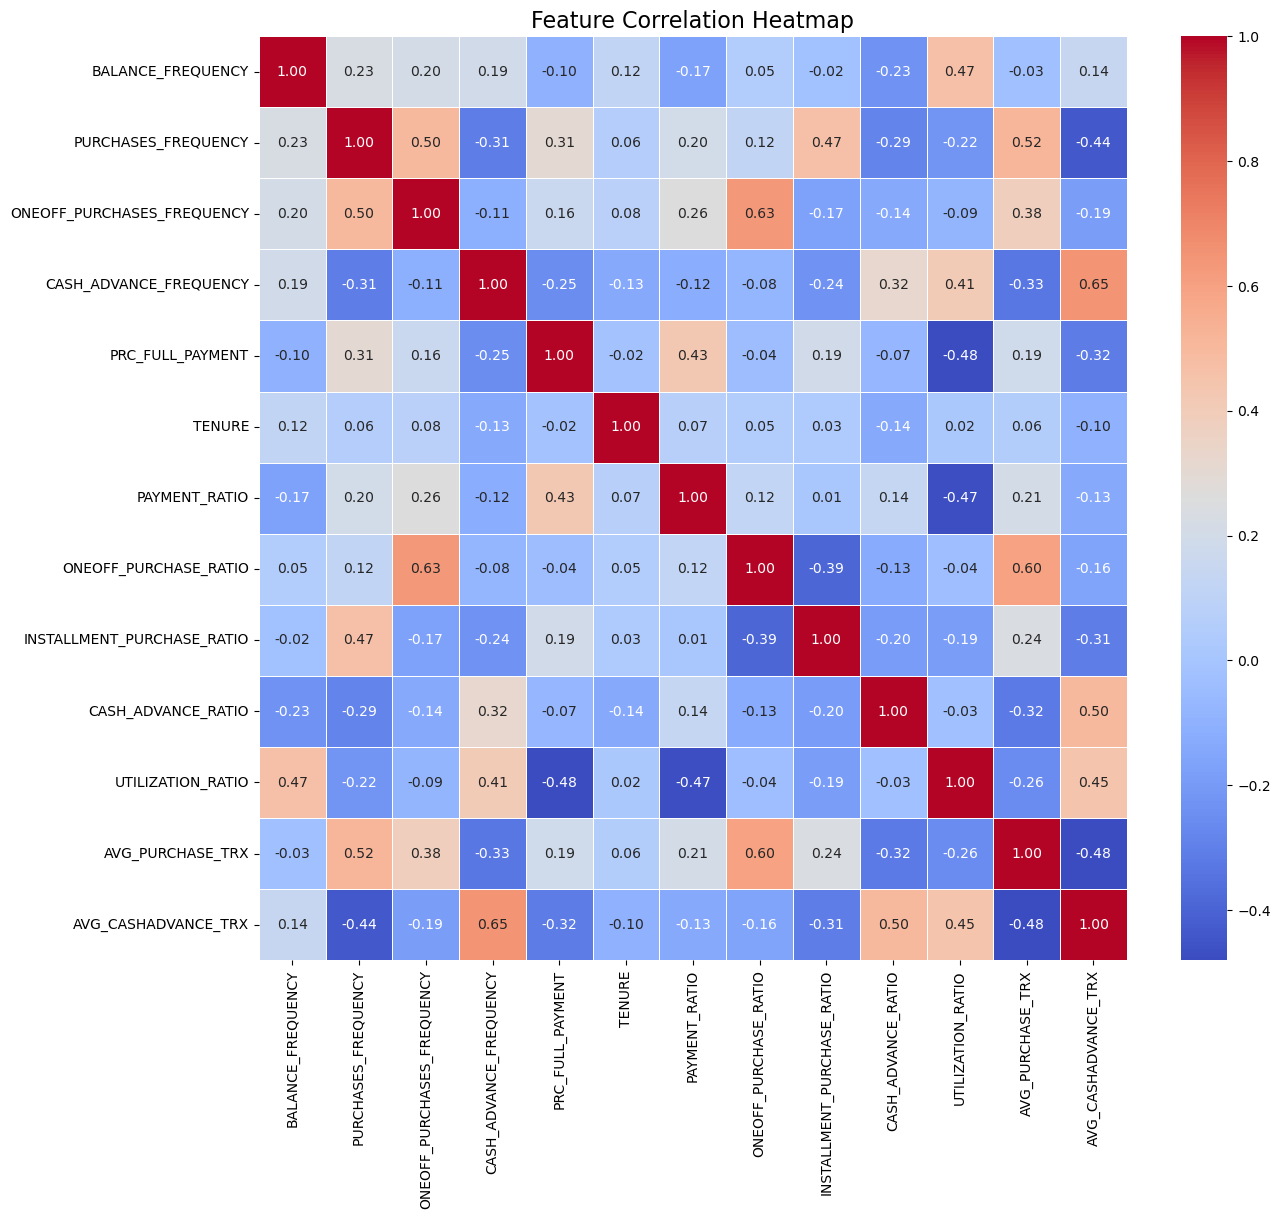

In [27]:
df_selected = df_selected.drop(columns=['PURCHASES_INSTALLMENTS_FREQUENCY'])
print("Dropped 'PURCHASES_INSTALLMENTS_FREQUENCY'. Remaining columns:")
print(df_selected.columns)

plt.figure(figsize=(14, 12))
corr_matrix = df_selected.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

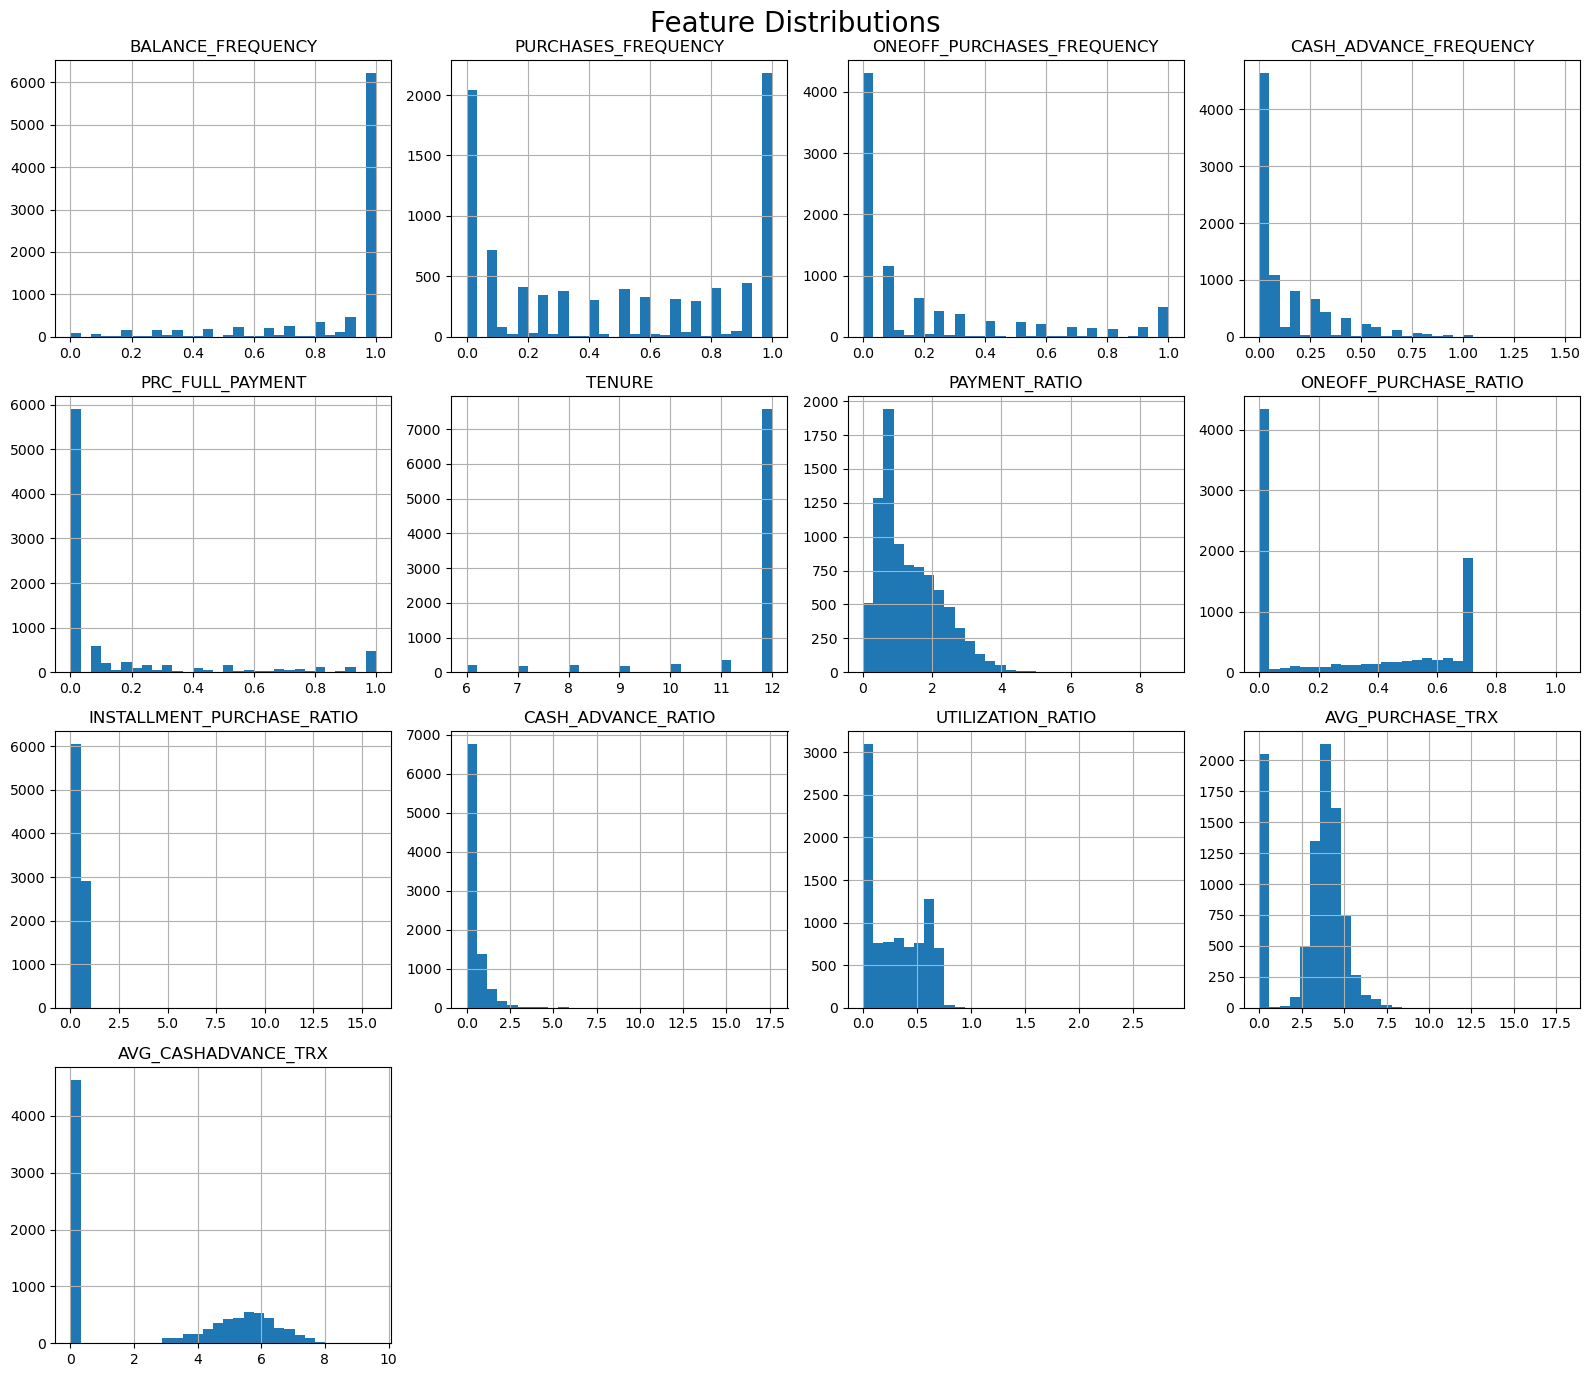

In [28]:
df_selected.hist(figsize=(16, 14), bins=30)
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout()
plt.show()

In [29]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BALANCE_FREQUENCY           8949 non-null   float64
 1   PURCHASES_FREQUENCY         8949 non-null   float64
 2   ONEOFF_PURCHASES_FREQUENCY  8949 non-null   float64
 3   CASH_ADVANCE_FREQUENCY      8949 non-null   float64
 4   PRC_FULL_PAYMENT            8949 non-null   float64
 5   TENURE                      8949 non-null   int64  
 6   PAYMENT_RATIO               8949 non-null   float64
 7   ONEOFF_PURCHASE_RATIO       8949 non-null   float64
 8   INSTALLMENT_PURCHASE_RATIO  8949 non-null   float64
 9   CASH_ADVANCE_RATIO          8949 non-null   float64
 10  UTILIZATION_RATIO           8949 non-null   float64
 11  AVG_PURCHASE_TRX            8949 non-null   float64
 12  AVG_CASHADVANCE_TRX         8949 non-null   float64
dtypes: float64(12), int64(1)
memory usage:

#### **-> Handling Outliers using Capping**

In [30]:
df_capped = df_selected.copy()
numeric_cols = df_capped.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    lower = df_capped[col].quantile(0.01)
    upper = df_capped[col].quantile(0.99)
    df_capped[col] = df_capped[col].clip(lower, upper)

print("Original shape:", df_selected.shape)
print("Capped shape:  ", df_capped.shape)

Original shape: (8949, 13)
Capped shape:   (8949, 13)


In [31]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BALANCE_FREQUENCY           8949 non-null   float64
 1   PURCHASES_FREQUENCY         8949 non-null   float64
 2   ONEOFF_PURCHASES_FREQUENCY  8949 non-null   float64
 3   CASH_ADVANCE_FREQUENCY      8949 non-null   float64
 4   PRC_FULL_PAYMENT            8949 non-null   float64
 5   TENURE                      8949 non-null   int64  
 6   PAYMENT_RATIO               8949 non-null   float64
 7   ONEOFF_PURCHASE_RATIO       8949 non-null   float64
 8   INSTALLMENT_PURCHASE_RATIO  8949 non-null   float64
 9   CASH_ADVANCE_RATIO          8949 non-null   float64
 10  UTILIZATION_RATIO           8949 non-null   float64
 11  AVG_PURCHASE_TRX            8949 non-null   float64
 12  AVG_CASHADVANCE_TRX         8949 non-null   float64
dtypes: float64(12), int64(1)
memory usage:

In [32]:
df_selected.columns

Index(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'PRC_FULL_PAYMENT', 'TENURE', 'PAYMENT_RATIO', 'ONEOFF_PURCHASE_RATIO',
       'INSTALLMENT_PURCHASE_RATIO', 'CASH_ADVANCE_RATIO', 'UTILIZATION_RATIO',
       'AVG_PURCHASE_TRX', 'AVG_CASHADVANCE_TRX'],
      dtype='object')

#### **-> Check Distributions After Capping**

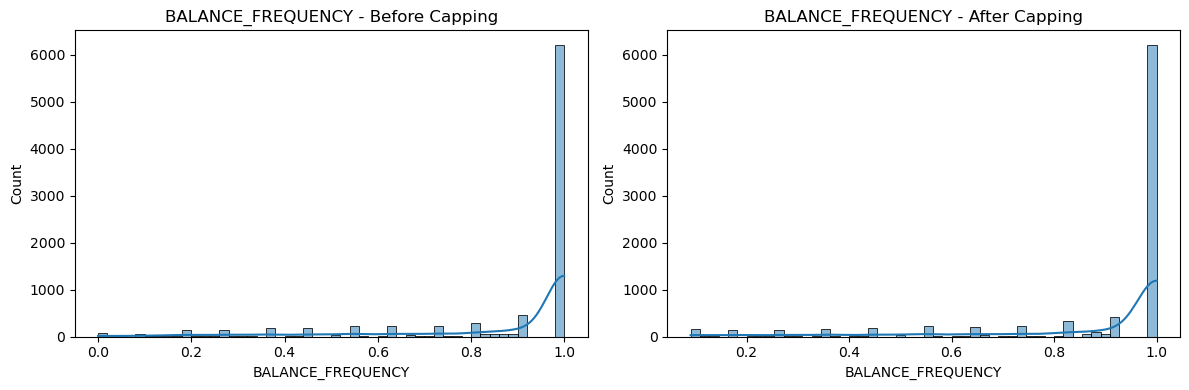

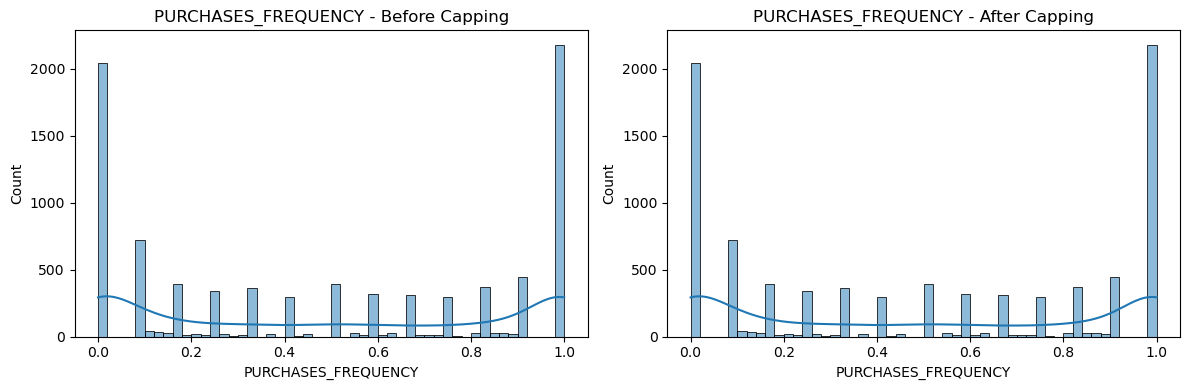

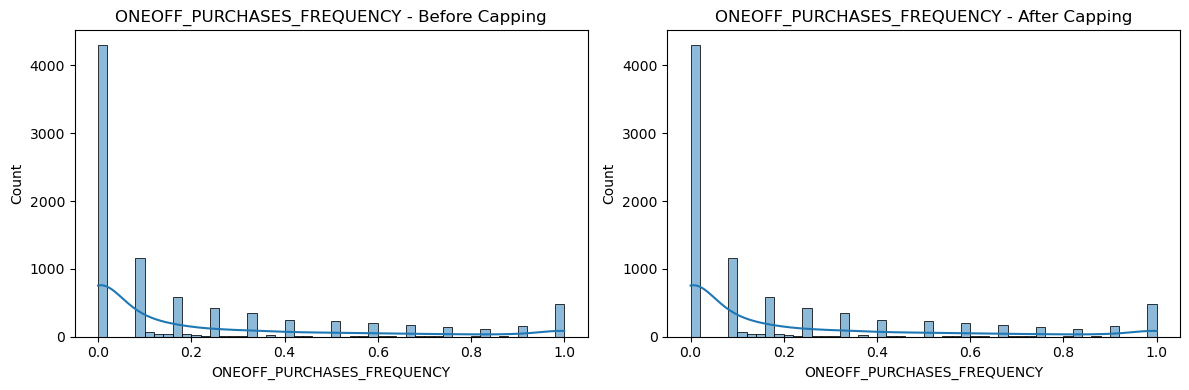

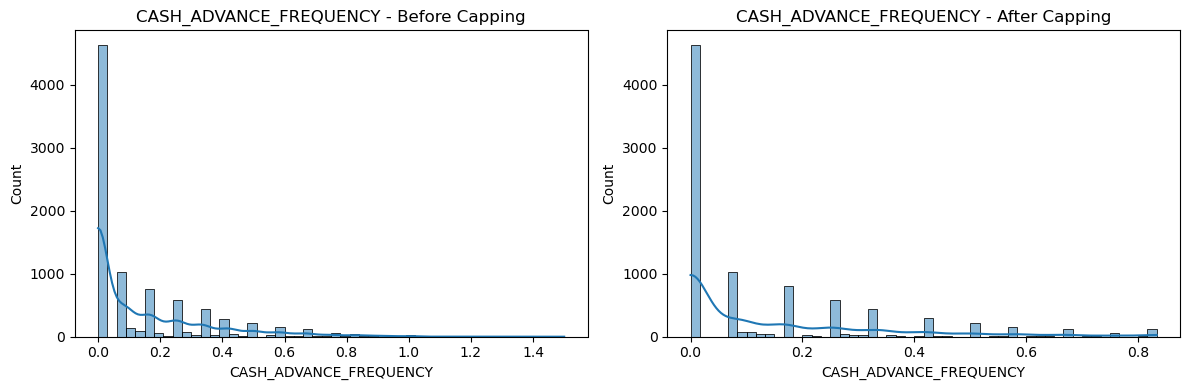

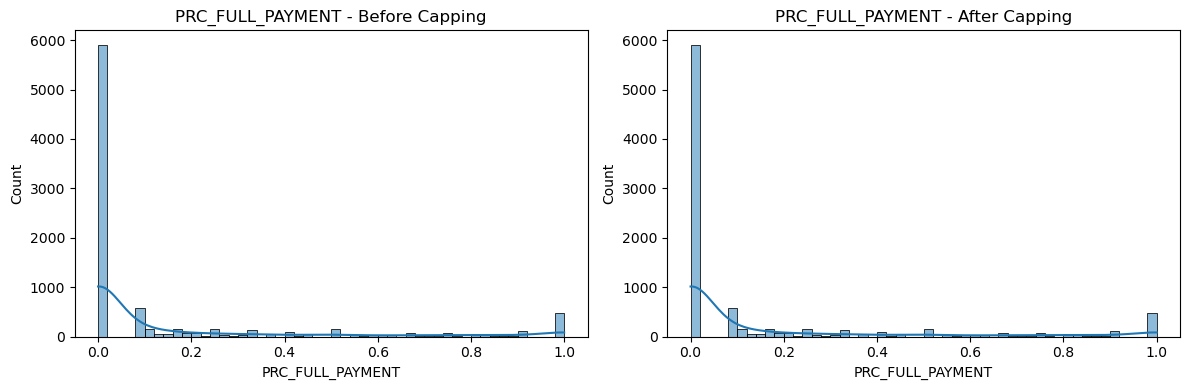

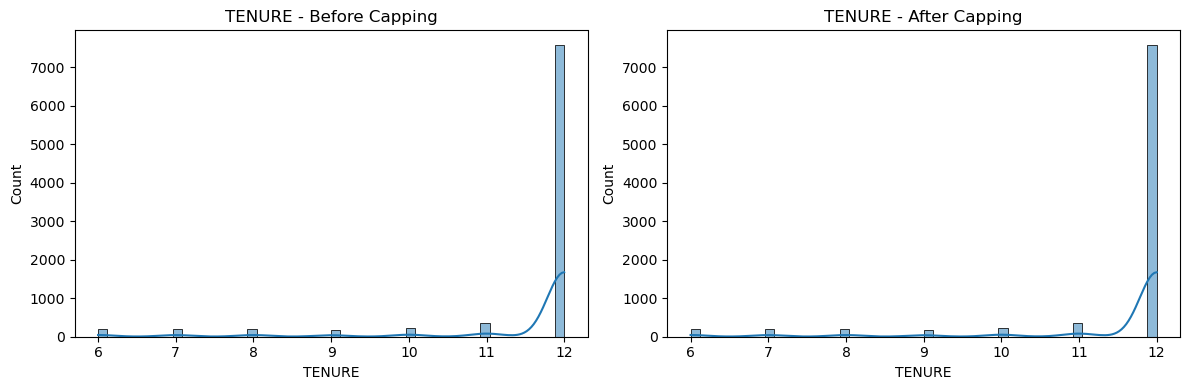

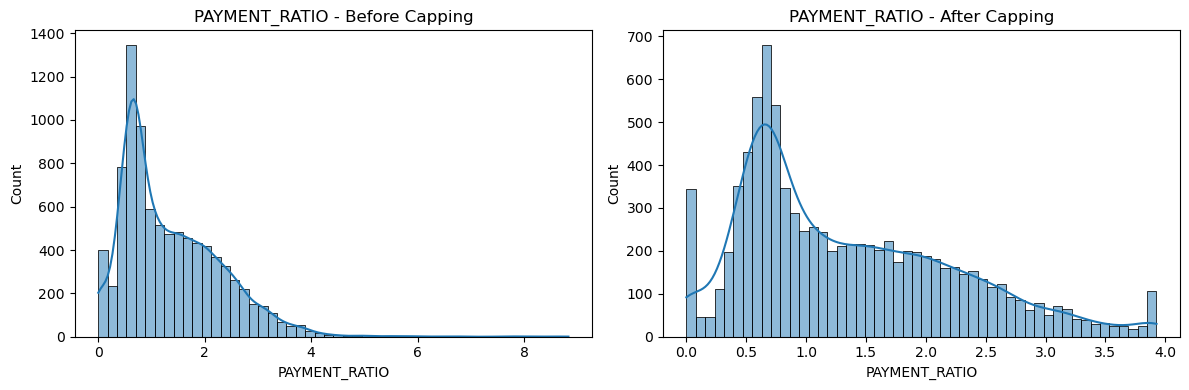

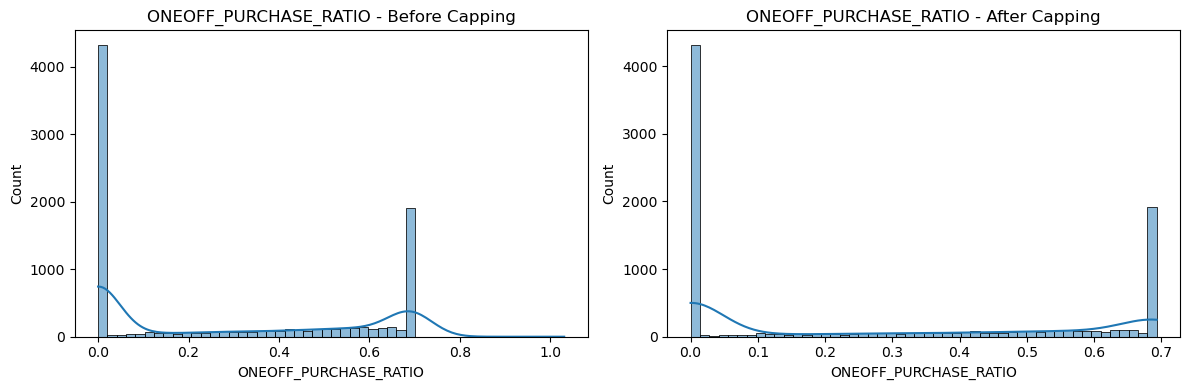

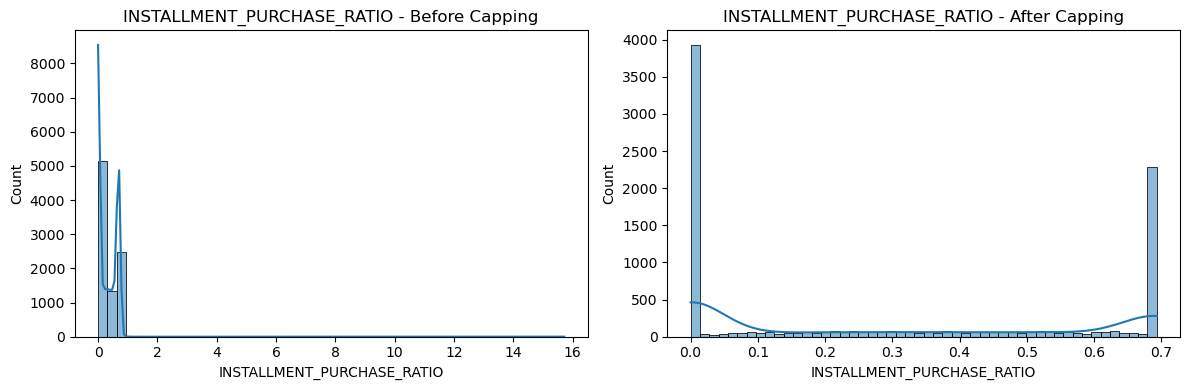

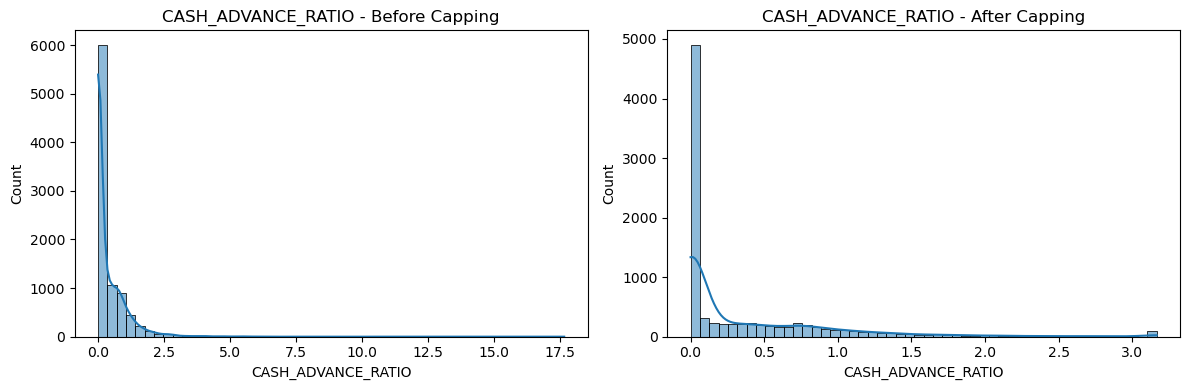

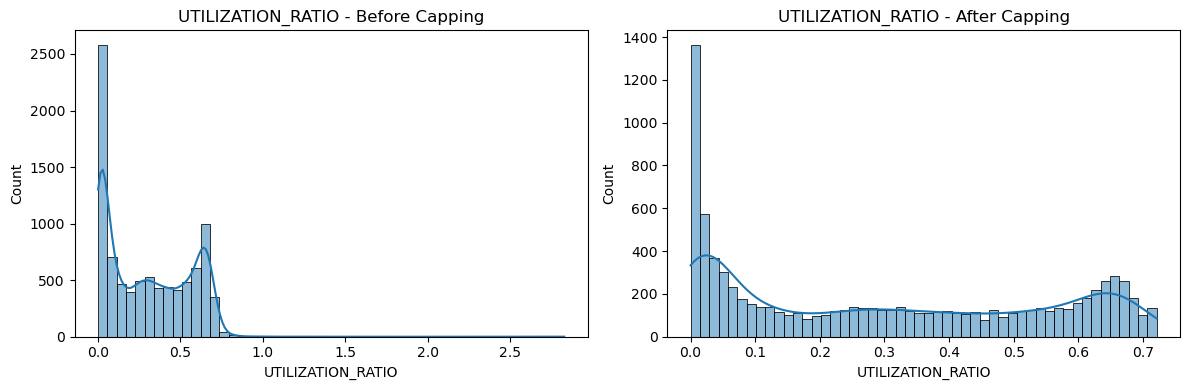

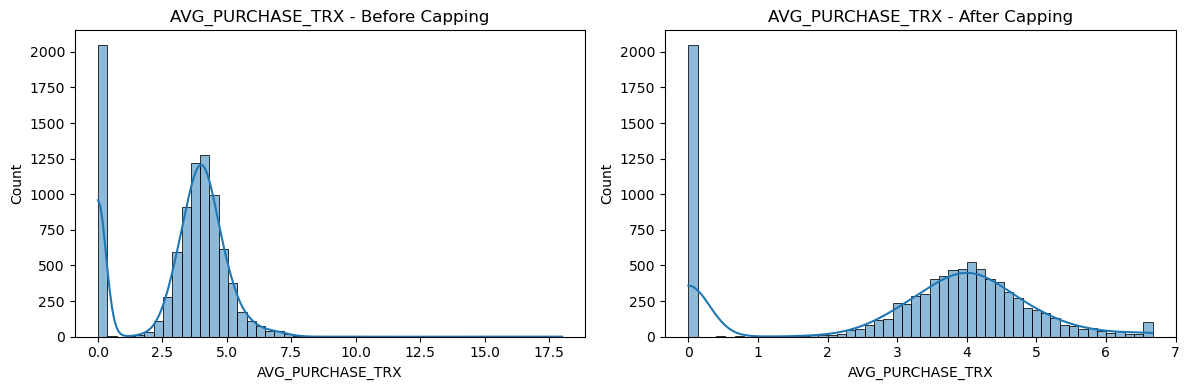

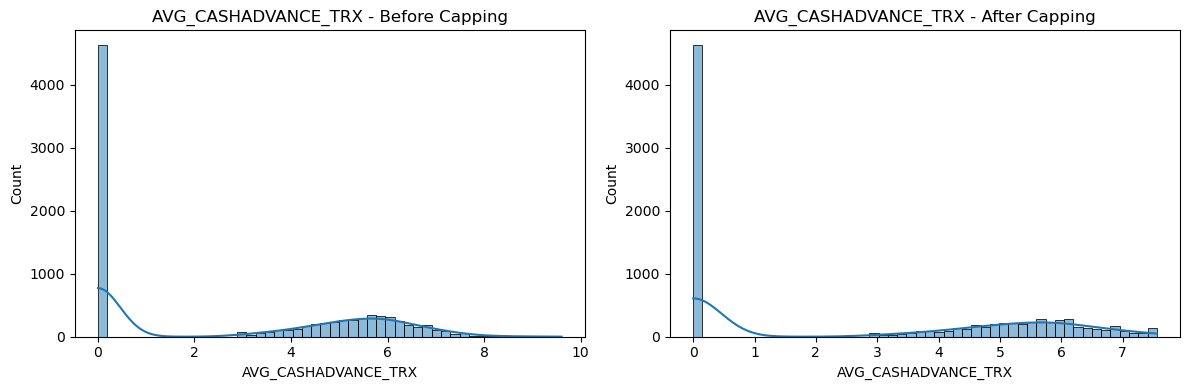

In [33]:
features_to_plot = [
    'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE', 'PAYMENT_RATIO',
    'ONEOFF_PURCHASE_RATIO', 'INSTALLMENT_PURCHASE_RATIO',
    'CASH_ADVANCE_RATIO', 'UTILIZATION_RATIO', 'AVG_PURCHASE_TRX',
    'AVG_CASHADVANCE_TRX'
]

for feature in features_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_selected[feature], bins=50, ax=axes[0], kde=True)
    axes[0].set_title(f'{feature} - Before Capping')
    
    sns.histplot(df_capped[feature], bins=50, ax=axes[1], kde=True)
    axes[1].set_title(f'{feature} - After Capping')
    
    plt.tight_layout()
    plt.show()

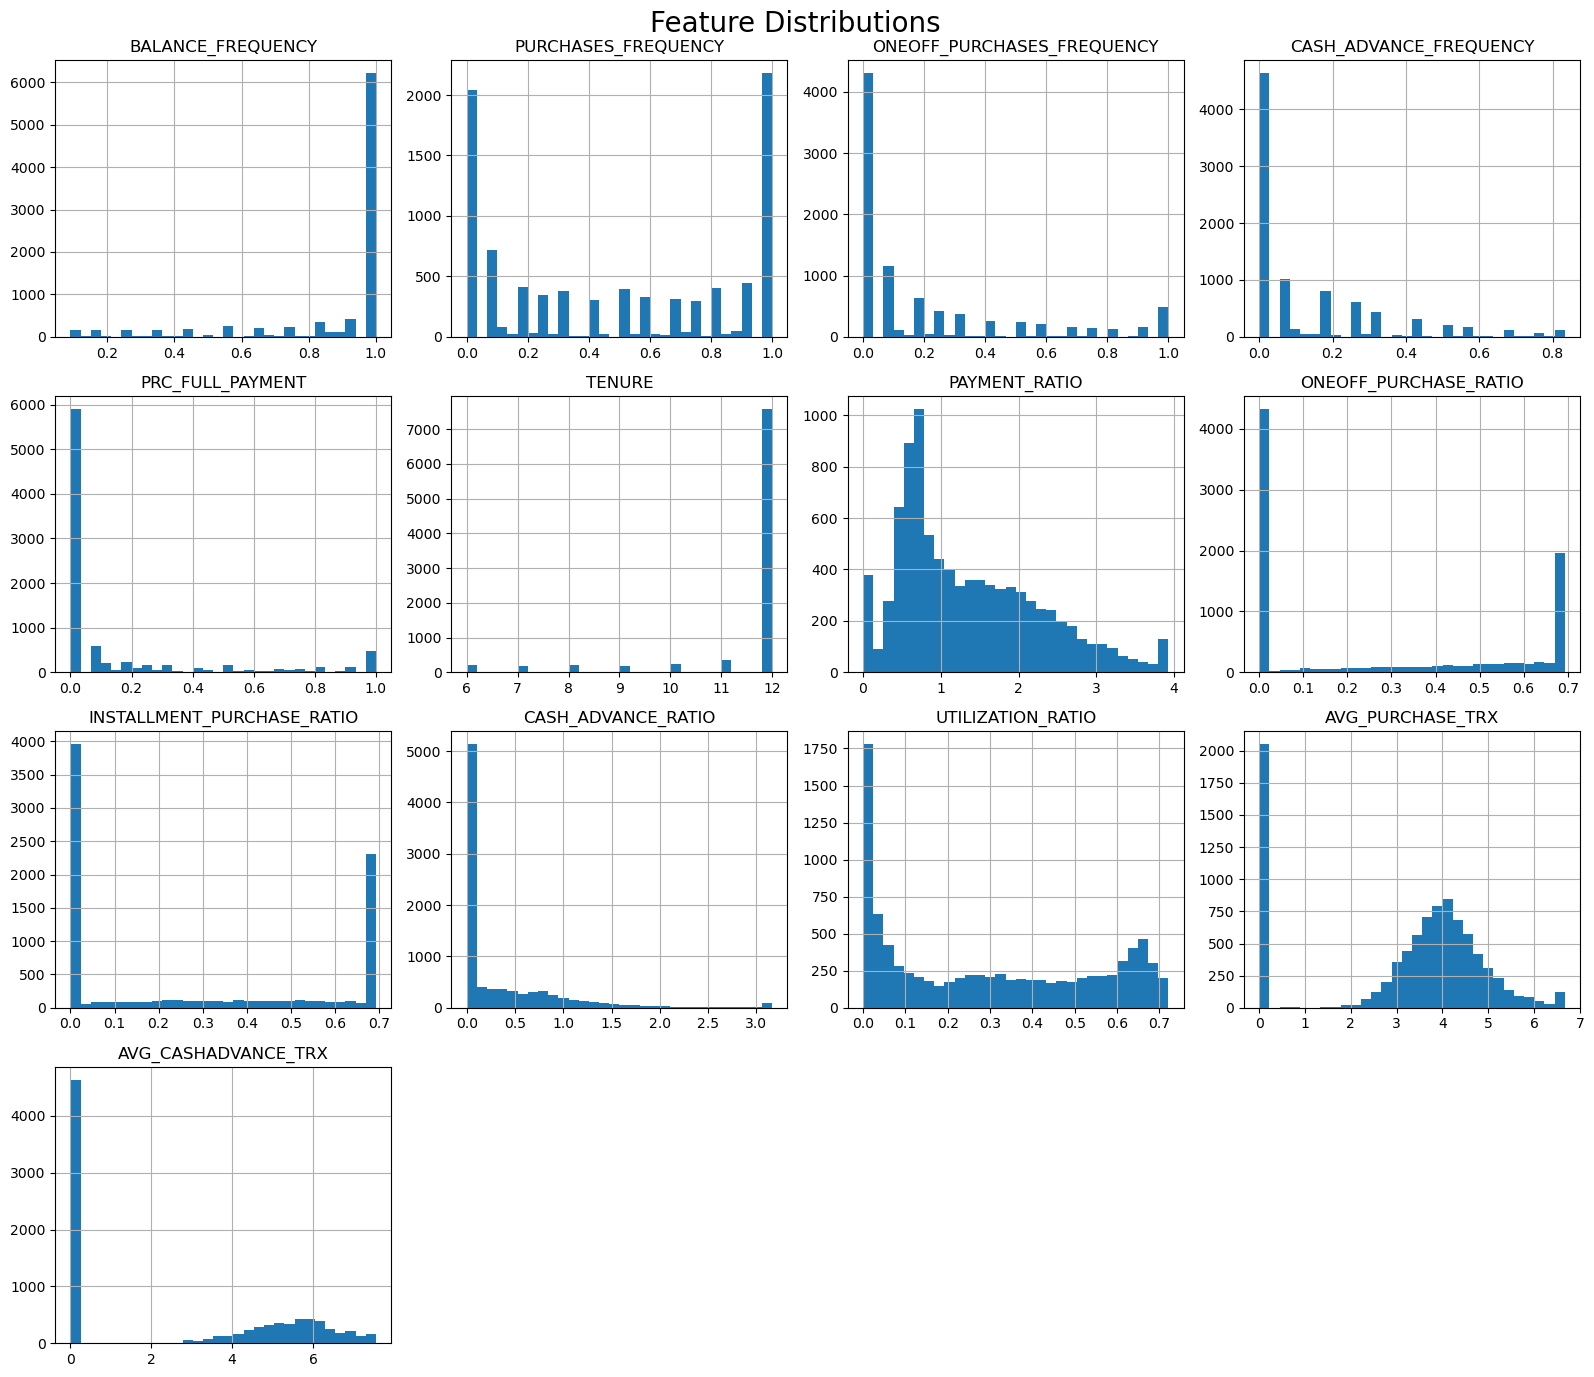

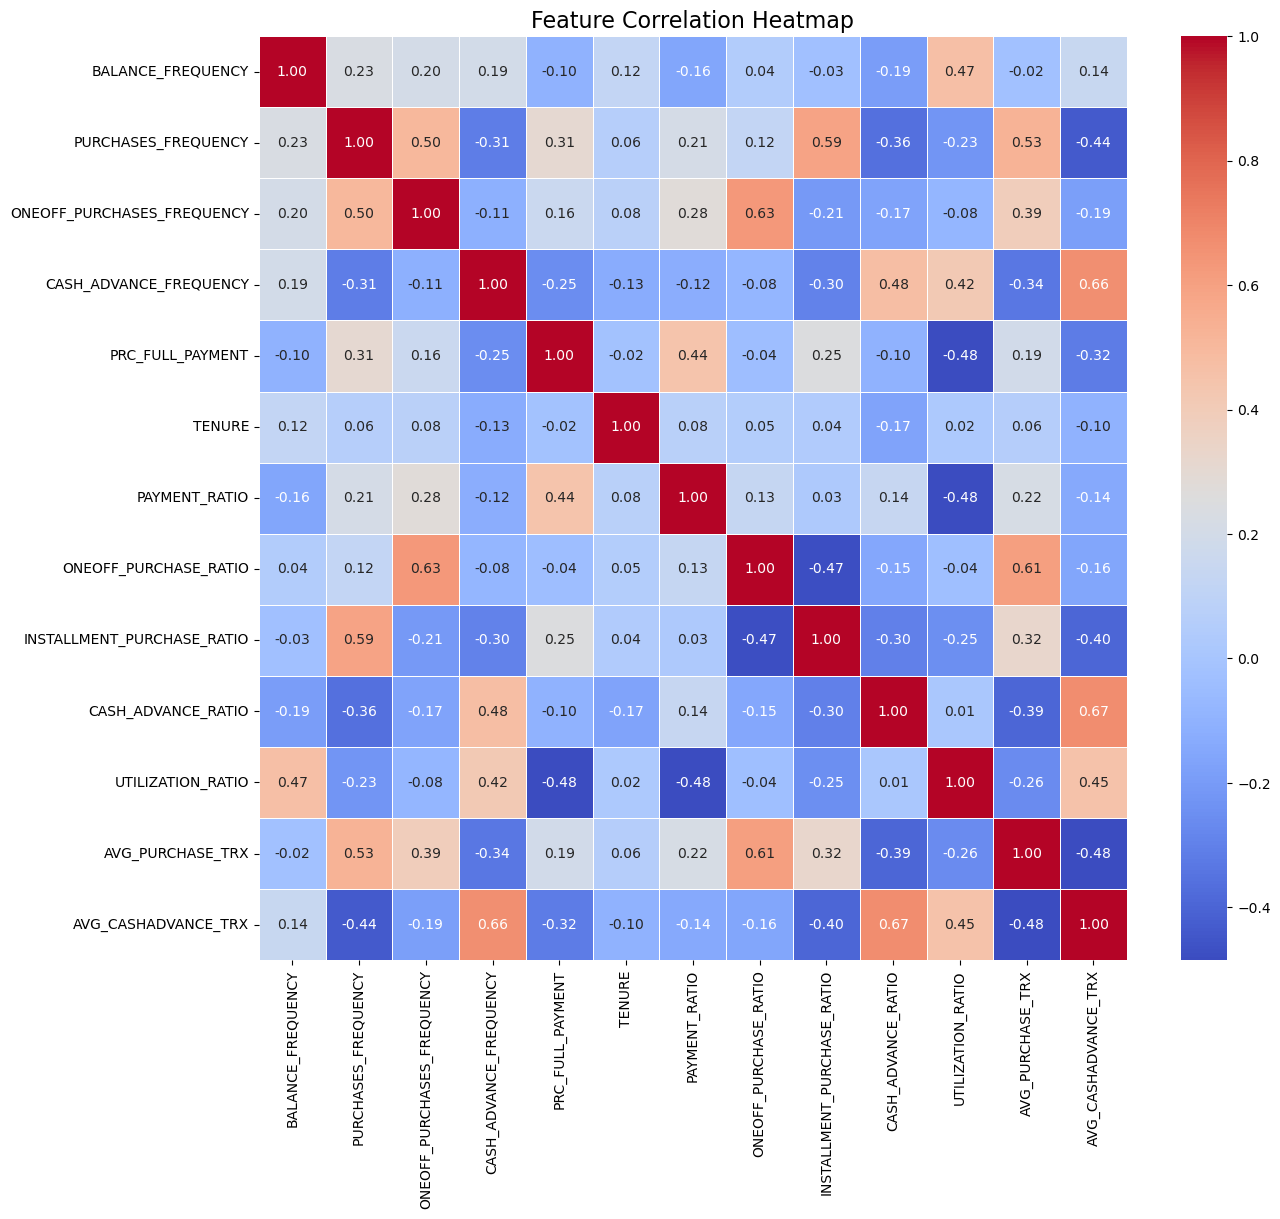

In [34]:
df_capped.hist(figsize=(16, 14), bins=30)
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 12))
corr_matrix = df_capped.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

#### **-> Scaling Features**

In [35]:
df_2 = df_capped.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_2) 
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BALANCE_FREQUENCY           8949 non-null   float64
 1   PURCHASES_FREQUENCY         8949 non-null   float64
 2   ONEOFF_PURCHASES_FREQUENCY  8949 non-null   float64
 3   CASH_ADVANCE_FREQUENCY      8949 non-null   float64
 4   PRC_FULL_PAYMENT            8949 non-null   float64
 5   TENURE                      8949 non-null   int64  
 6   PAYMENT_RATIO               8949 non-null   float64
 7   ONEOFF_PURCHASE_RATIO       8949 non-null   float64
 8   INSTALLMENT_PURCHASE_RATIO  8949 non-null   float64
 9   CASH_ADVANCE_RATIO          8949 non-null   float64
 10  UTILIZATION_RATIO           8949 non-null   float64
 11  AVG_PURCHASE_TRX            8949 non-null   float64
 12  AVG_CASHADVANCE_TRX         8949 non-null   float64
dtypes: float64(12), int64(1)
memory usage:

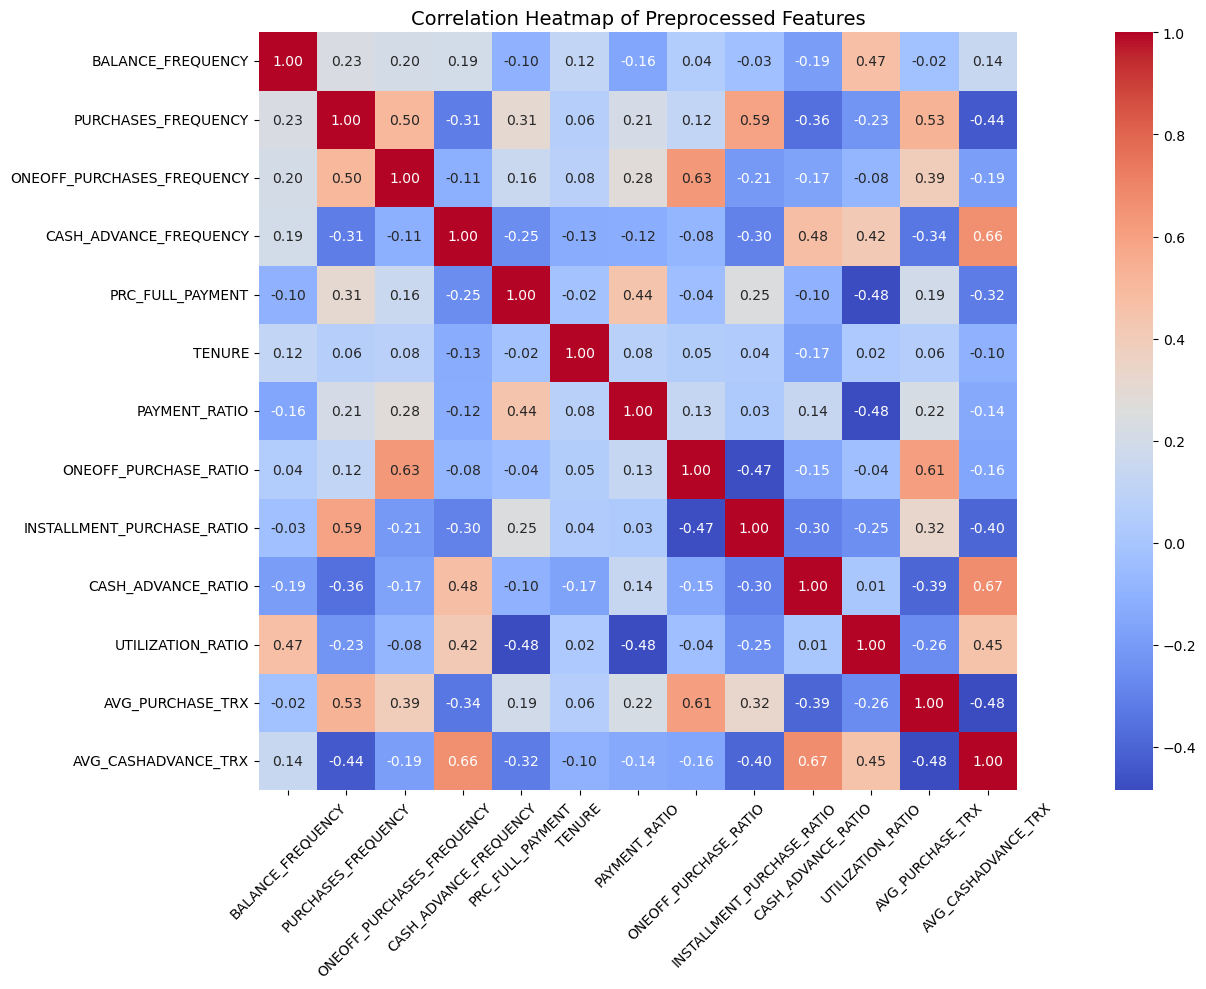

In [36]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_2.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Preprocessed Features", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


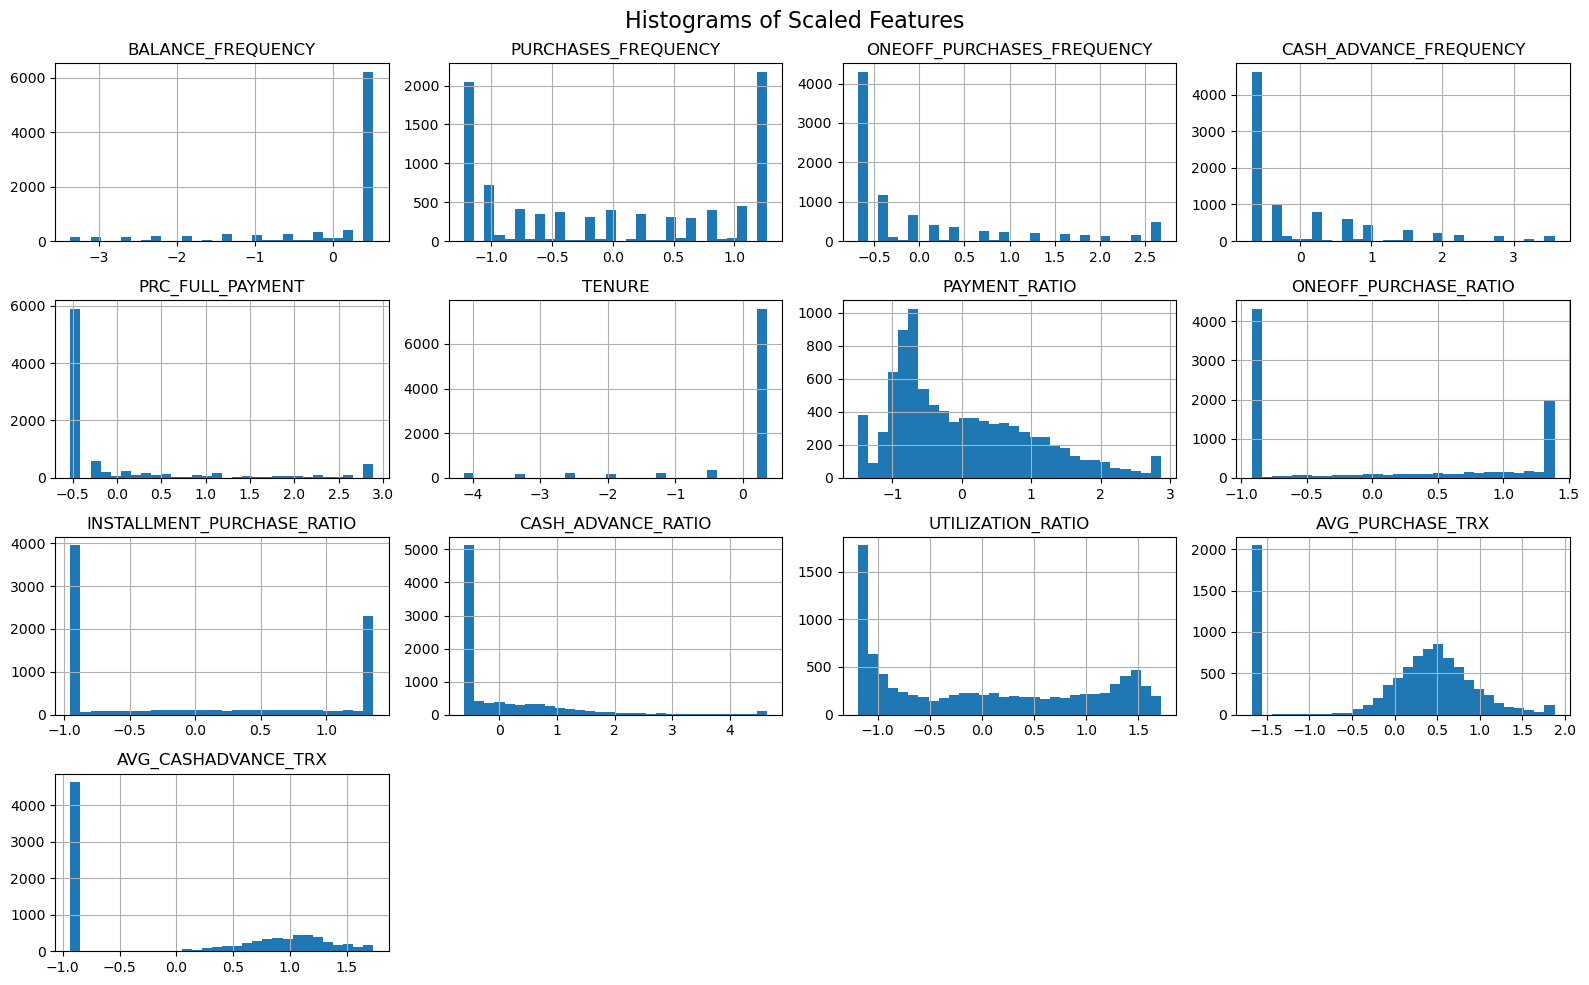

In [37]:
df_scaled = pd.DataFrame(X_scaled, columns=df_2.columns)

df_scaled.hist(bins=30, figsize=(16, 10), layout=(4, 4))
plt.suptitle("Histograms of Scaled Features", fontsize=16)
plt.tight_layout()
plt.show()


## **2. Determining Optimal Clusters**

#### **-> Dimentionality Reduction** (with Random No of Clusters)

In [38]:
kmeans_no_pca = KMeans(n_clusters=4, random_state=42)
labels_no_pca = kmeans_no_pca.fit_predict(X_scaled)
score_no_pca = silhouette_score(X_scaled, labels_no_pca)
print(f"Silhouette Score (No PCA): {score_no_pca:.3f}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=4, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)
score_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score (With PCA): {score_pca:.3f}")


c:\Users\Hend-PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Hend-PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Hend-PC\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Hend-PC\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Hend-PC\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi

Silhouette Score (No PCA): 0.207
Silhouette Score (With PCA): 0.462


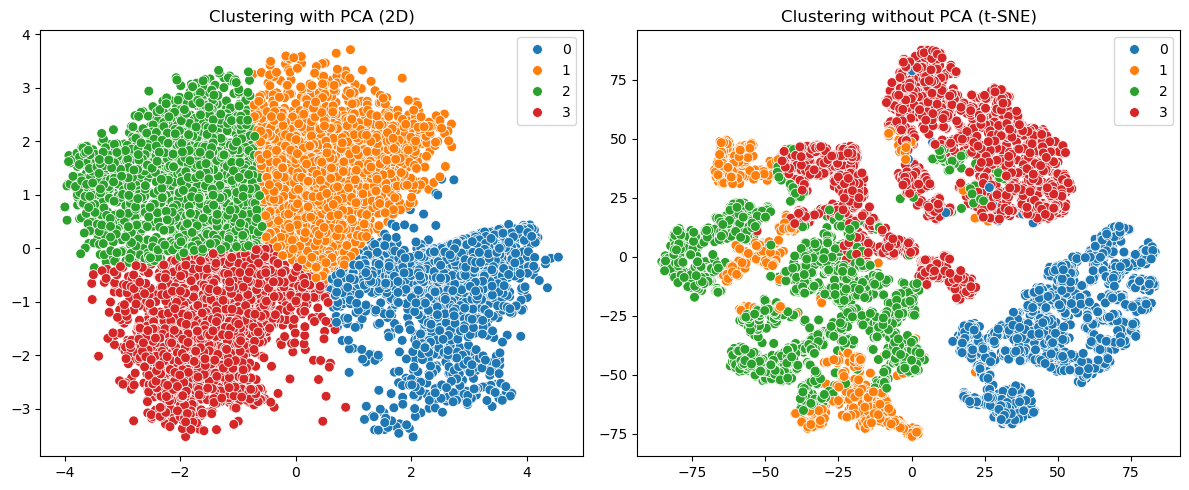

In [39]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_pca, palette='tab10', s=50)
plt.title("Clustering with PCA (2D)")

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_no_pca, palette='tab10', s=50)
plt.title("Clustering without PCA (t-SNE)")

plt.tight_layout()
plt.show()


#### **-> Determining Best Number of Clusters** (Elbow Method and Silhouette Scores)

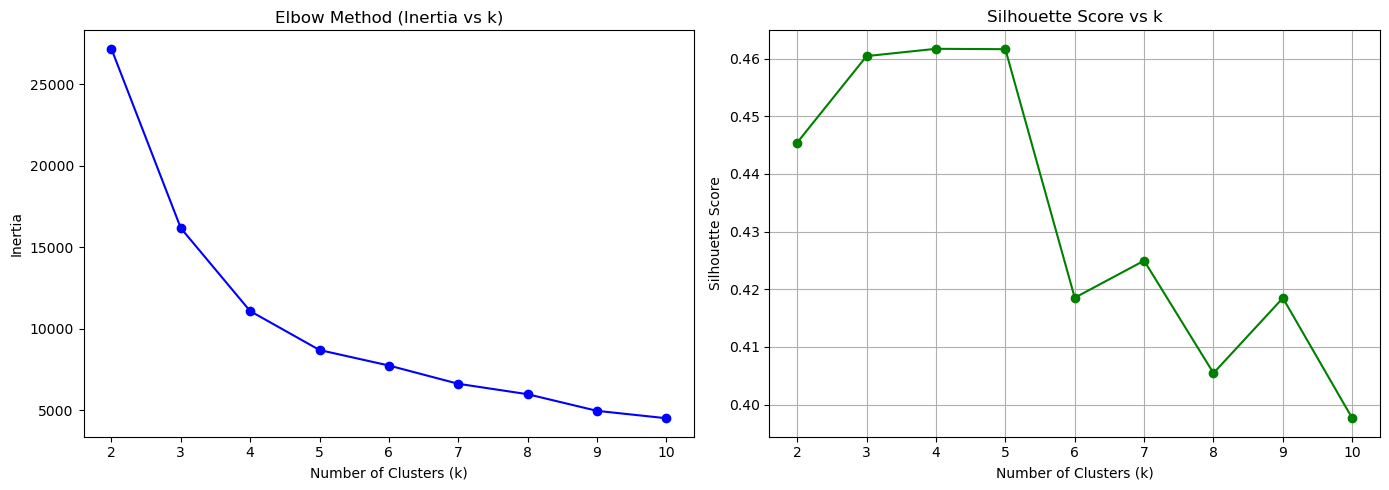

In [40]:
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # Use PCA-reduced data
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.grid(True)
axes[0].plot(K, inertias, 'bo-')
axes[0].set_title('Elbow Method (Inertia vs k)')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')

axes[1].plot(K, silhouette_scores, 'go-')
axes[1].set_title('Silhouette Score vs k')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.grid(True)
plt.show()

## **3. Customer Segmentation**

Comparing Multiple Clustering Algorithms to Choose the Best

In [41]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=30)
    plt.title(title)
    plt.show()

**A) Kmeans**

KMeans: 0.46170486596039323


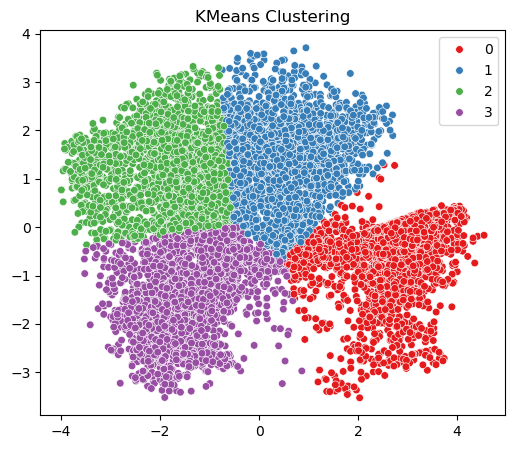

In [42]:
kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans_pca.fit_predict(X_pca)
print("KMeans:", silhouette_score(X_pca, kmeans_labels))
plot_clusters(X_pca, kmeans_labels, "KMeans Clustering")

**B) Agglomerative Clustering**

Agglomerative: 0.4349764902601061


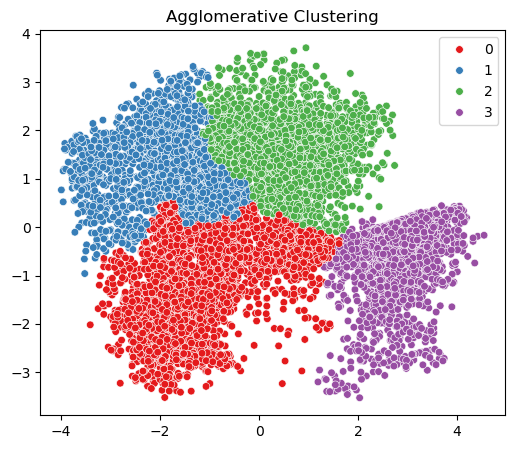

In [43]:
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(X_pca)
print("Agglomerative:", silhouette_score(X_pca, agg_labels))
plot_clusters(X_pca, agg_labels, "Agglomerative Clustering")

**C)Gaussian Mixture Model (GMM)**

GMM: 0.4453931248301208


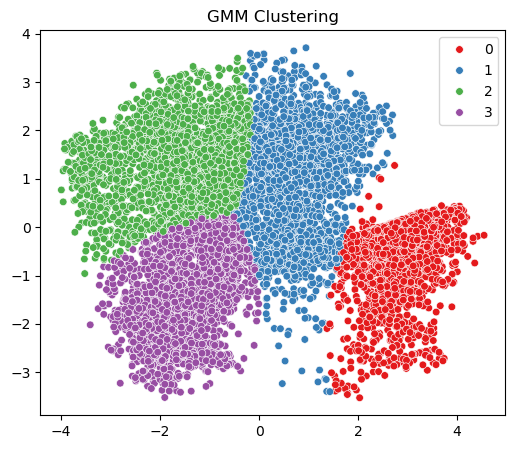

In [44]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)
print("GMM:", silhouette_score(X_pca, gmm_labels))
plot_clusters(X_pca, gmm_labels, "GMM Clustering")

So, since Kmeans gave best results, we will proceed with kmeans

In [46]:
df['Cluster'] = kmeans_labels
cluster_profile = df.groupby('Cluster').mean()


In [47]:
cluster_profile

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        2229.381678           0.887589    52.402291          2.839068   
1        2656.881903           0.966731  1044.011586        698.090446   
2        1201.494775           0.922907  2541.059208       1873.344090   
3         400.808199           0.765323   674.437577         77.942904   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     49.724486   2123.156958             0.077794   
1                    346.130664   1775.758192             0.493152   
2                    667.739829     36.946229             0.740505   
3                    597.201708     39.810429             0.677173   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.002920                          0.068853   
1                          0.283989                          0.300858   
2                          0.572971                          0.437384   
3                          0.041621                          0.629151   

         CASH_ADVANCE_FREQUENCY  ...  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Cluster                          ...                                       
0                      0.280522  ...       1021.107204          0.042631   
1                      0.253628  ...       1303.029547          0.025977   
2                      0.009543  ...        510.437800          0.227123   
3                      0.007224  ...        590.410823          0.296965   

            TENURE  PAYMENT_RATIO  ONEOFF_PURCHASE_RATIO  \
Cluster                                                    
0        11.266722       9.173954               0.013782   
1        11.553698       2.961414               0.762208   
2        11.777105       8.655738               0.778885   
3        11.524231      13.892212               0.121682   

         INSTALLMENT_PURCHASE_RATIO  CASH_ADVANCE_RATIO  UTILIZATION_RATIO  \
Cluster                                                                      
0                       3635.166012        67896.064770           0.577066   
1                          0.238684         5235.714258           0.621464   
2                          0.221122            0.085284           0.230973   
3                          0.880080            0.296296           0.159759   

         AVG_PURCHASE_TRX  AVG_CASHADVANCE_TRX  
Cluster                                         
0                6.928913           489.924976  
1              109.436198           306.467250  
2              141.978467            19.855969  
3            30293.459974            20.485820  

[4 rows x 24 columns]

In [48]:
cluster_profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4 non-null      float64
 1   BALANCE_FREQUENCY                 4 non-null      float64
 2   PURCHASES                         4 non-null      float64
 3   ONEOFF_PURCHASES                  4 non-null      float64
 4   INSTALLMENTS_PURCHASES            4 non-null      float64
 5   CASH_ADVANCE                      4 non-null      float64
 6   PURCHASES_FREQUENCY               4 non-null      float64
 7   ONEOFF_PURCHASES_FREQUENCY        4 non-null      float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4 non-null      float64
 9   CASH_ADVANCE_FREQUENCY            4 non-null      float64
 10  CASH_ADVANCE_TRX                  4 non-null      float64
 11  PURCHASES_TRX                     4 non-null      float64
 12  CREDIT_LIMIT     

In [49]:
cluster_profile.to_csv('cluster_profile.csv', index=True)

## **4. Visualization and Analysis**

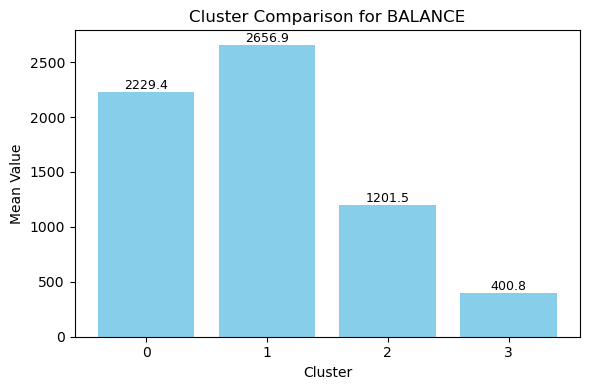

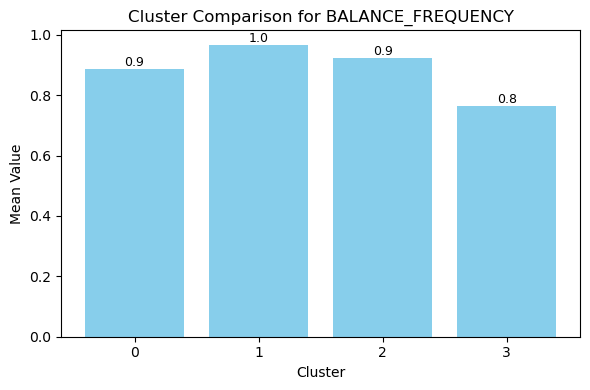

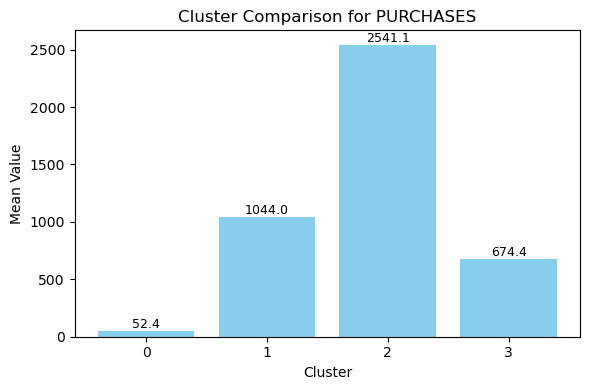

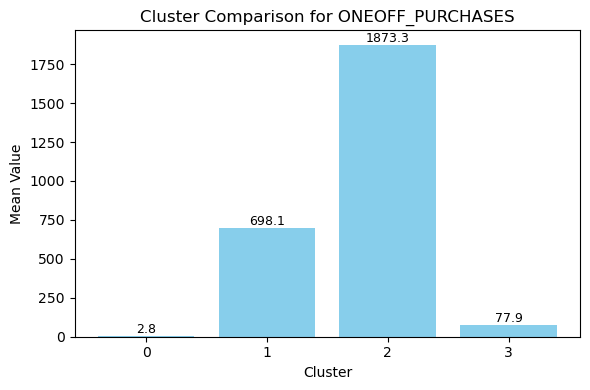

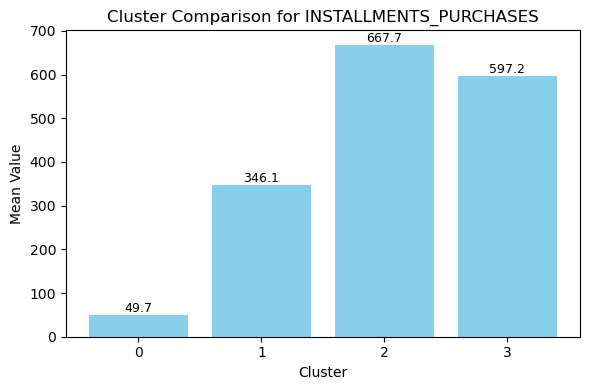

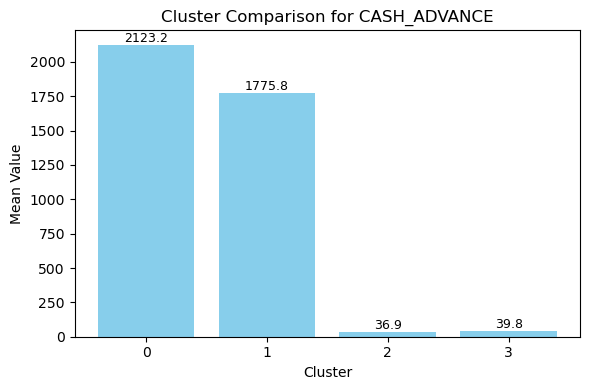

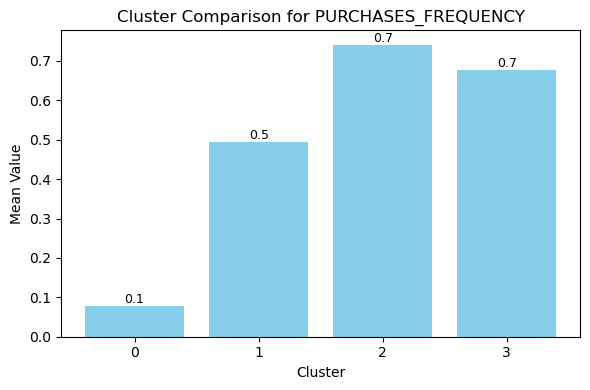

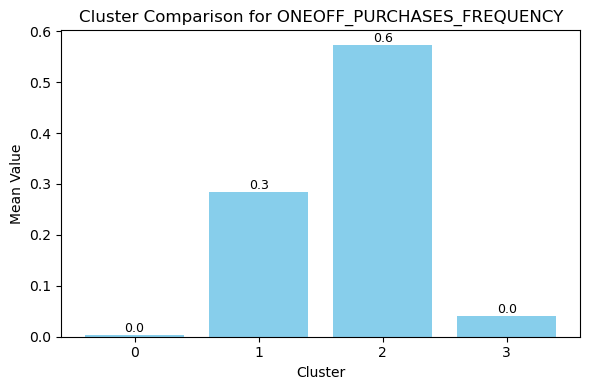

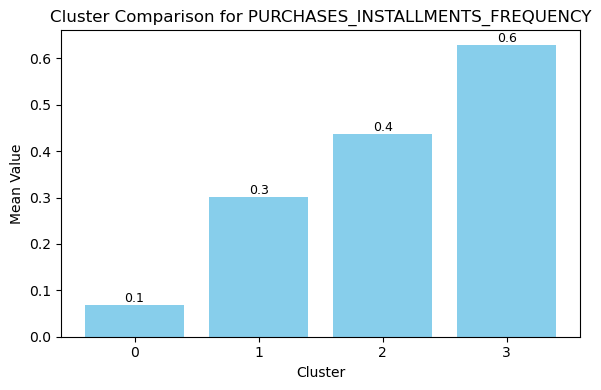

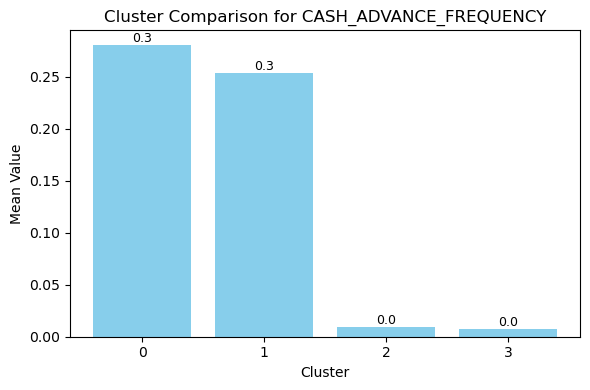

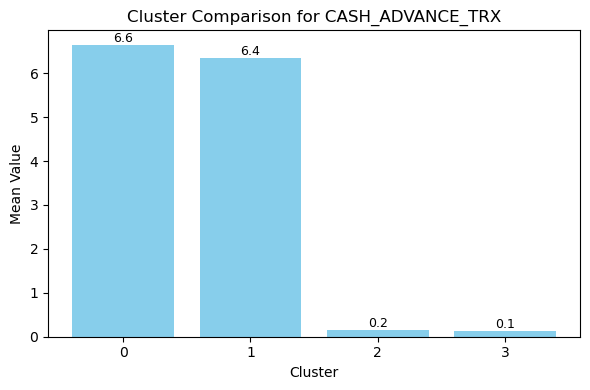

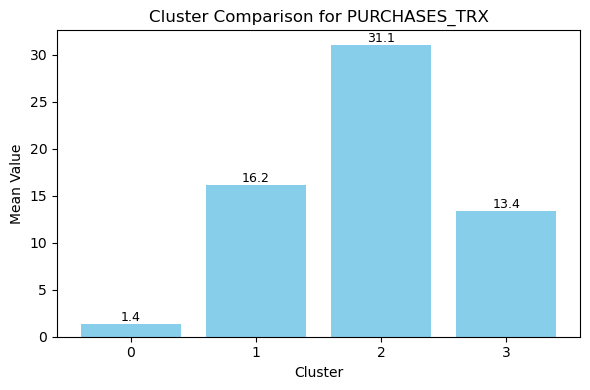

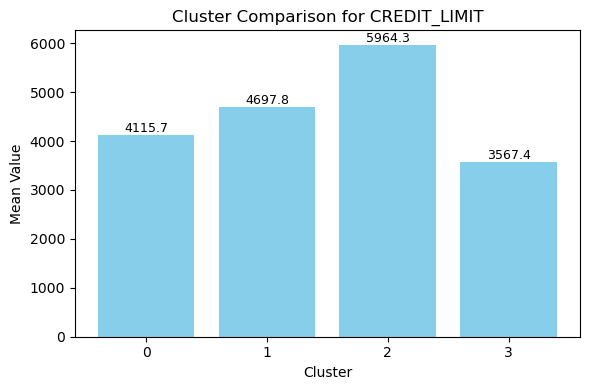

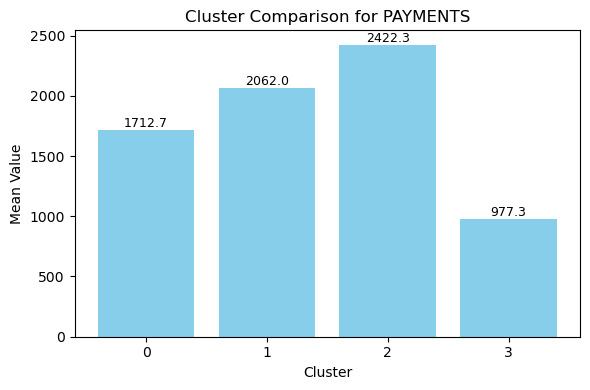

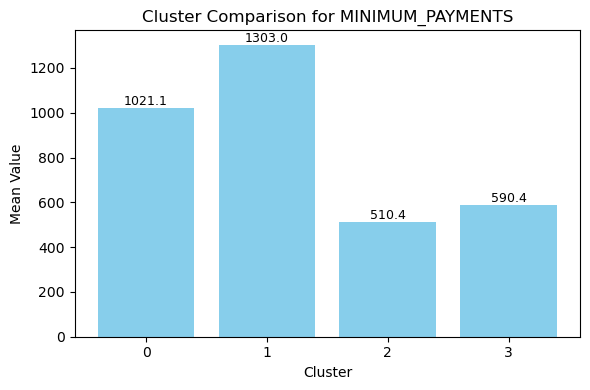

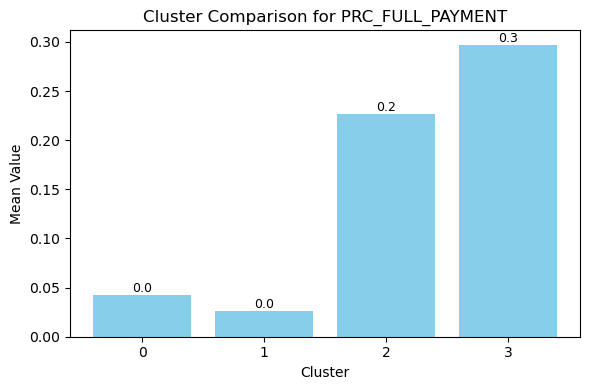

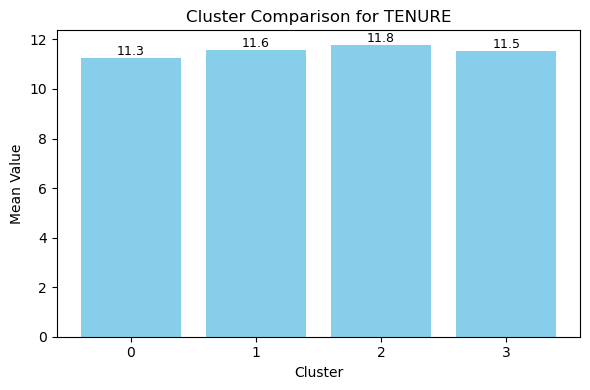

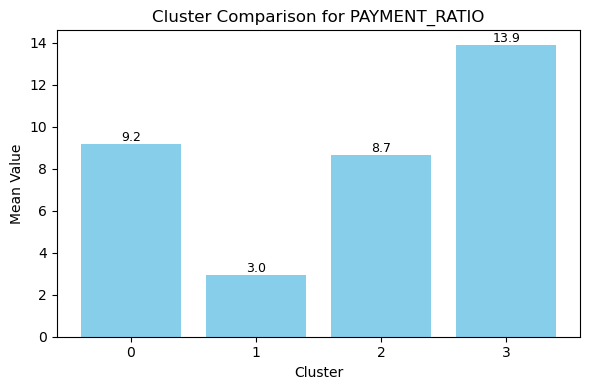

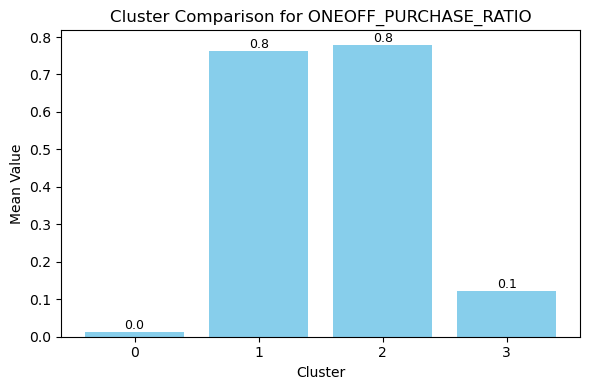

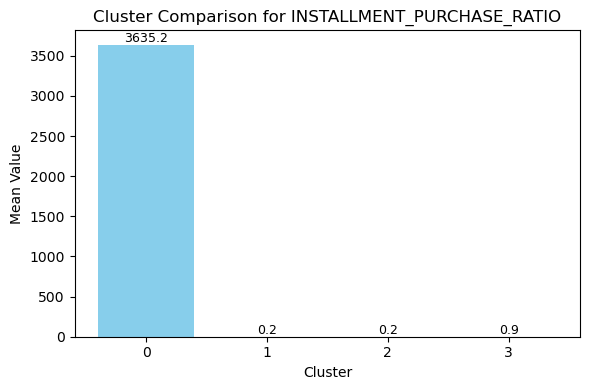

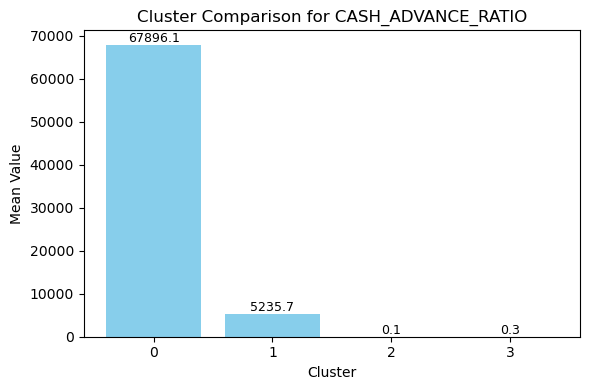

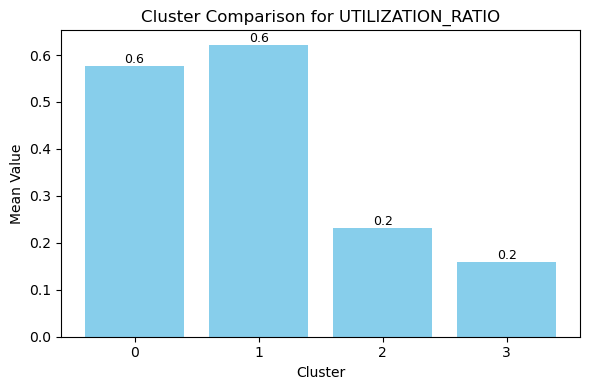

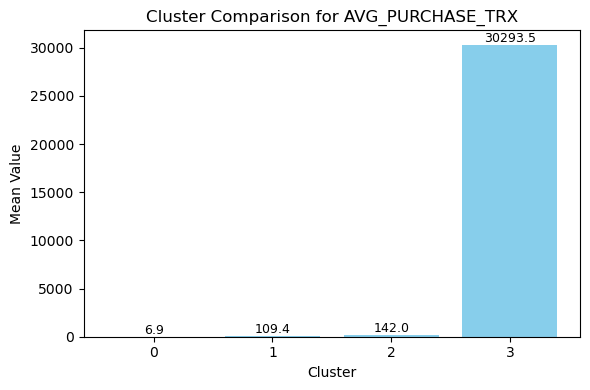

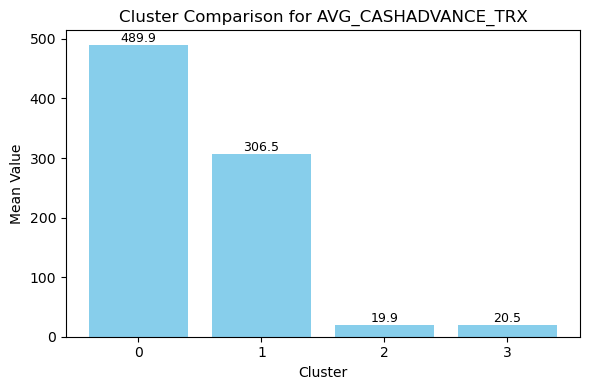

In [50]:
for column in cluster_profile.columns:
    plt.figure(figsize=(6, 4))
    bars = plt.bar(cluster_profile.index.astype(str), cluster_profile[column], color='skyblue')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}', va='bottom', ha='center', fontsize=9)

    plt.title(f'Cluster Comparison for {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')
    plt.tight_layout()
    plt.show()

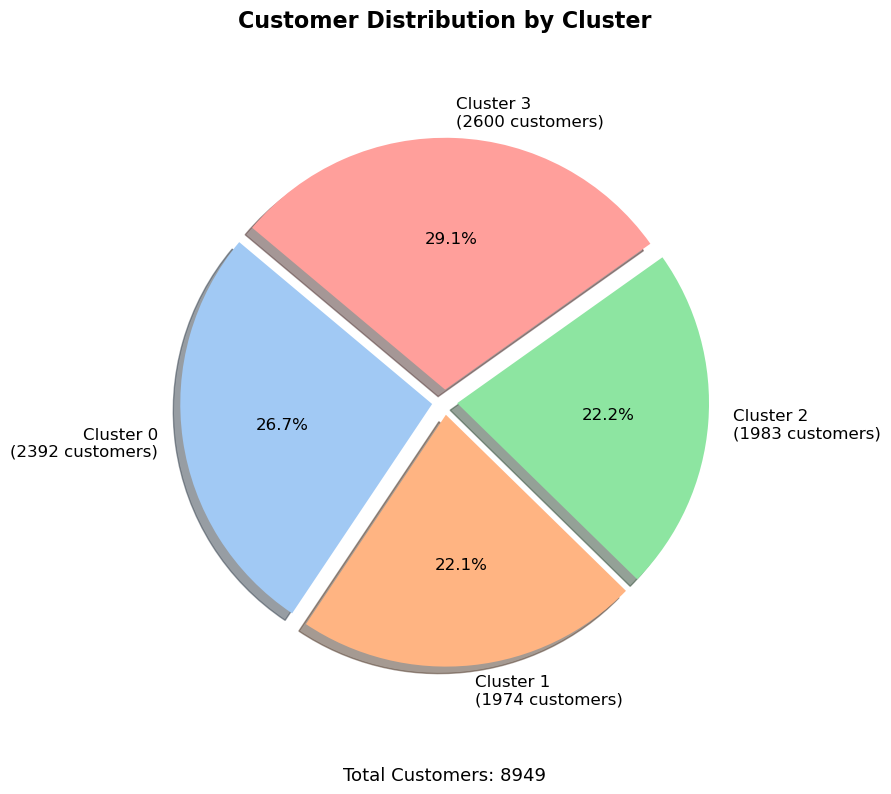

In [51]:
# Count customers in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
total_customers = cluster_counts.sum()

# Define custom pastel colors
colors = sns.color_palette('pastel', len(cluster_counts))

# Slightly explode each slice for emphasis
explode = [0.05] * len(cluster_counts)

# Labels showing cluster and count
labels = [f'Cluster {i}\n({count} customers)' for i, count in cluster_counts.items()]

# Plot
plt.figure(figsize=(9, 9))
plt.pie(cluster_counts,
        labels=labels,
        colors=colors,
        explode=explode,
        autopct='%1.1f%%',
        startangle=140,
        shadow=True,
        textprops={'fontsize': 12})

plt.title('Customer Distribution by Cluster', fontsize=16, fontweight='bold')
plt.axis('equal')  # Make the pie a circle

# Add total customers as text below the pie chart
plt.text(0, -1.5, f'Total Customers: {total_customers}', fontsize=13, ha='center')

plt.tight_layout()
plt.show()


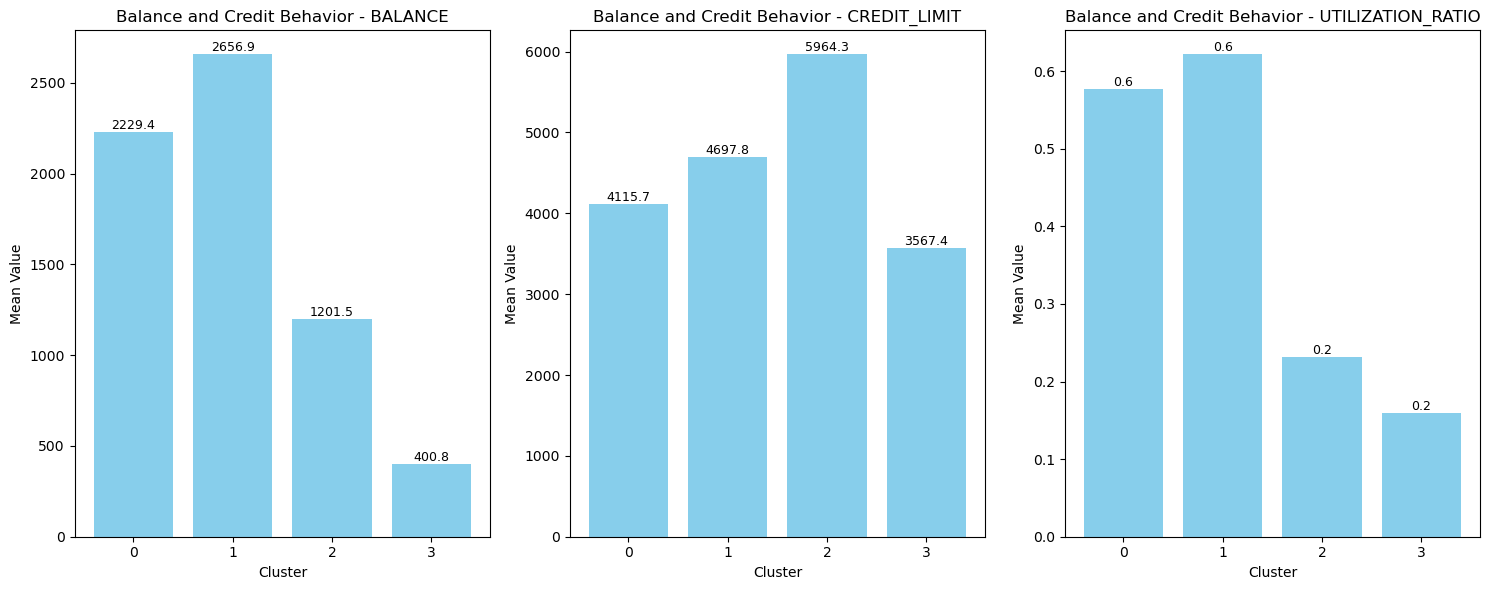

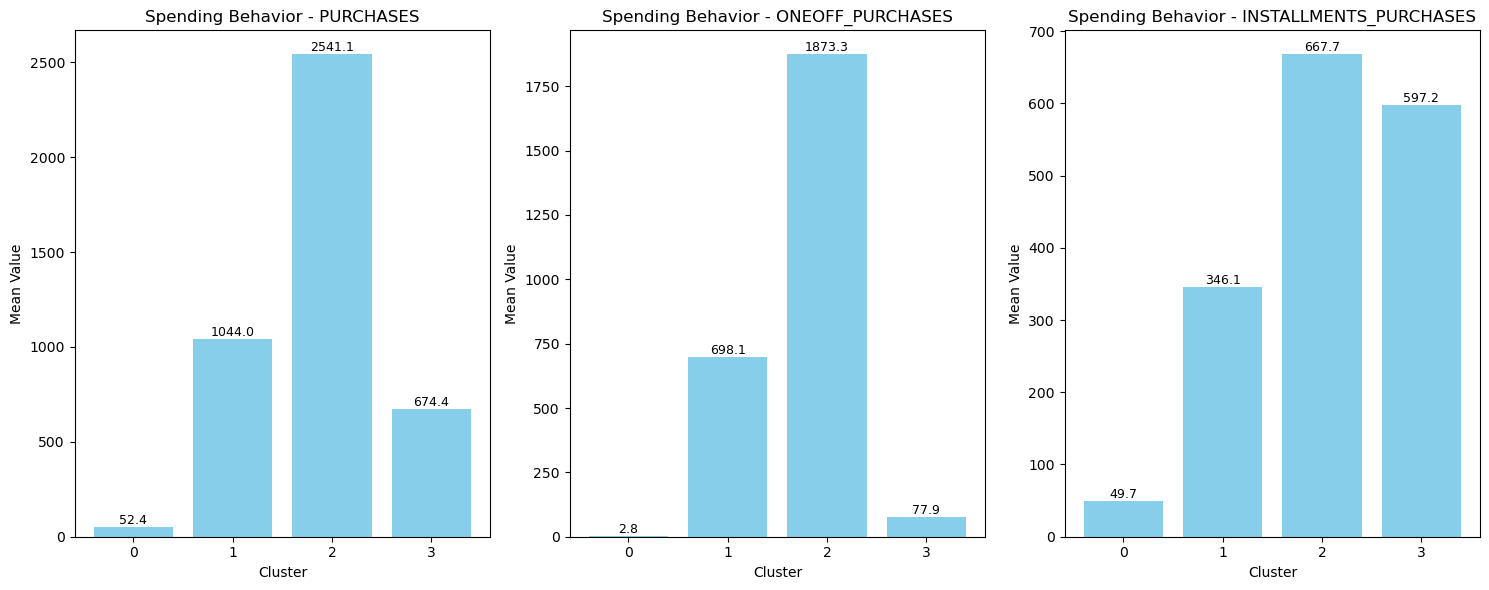

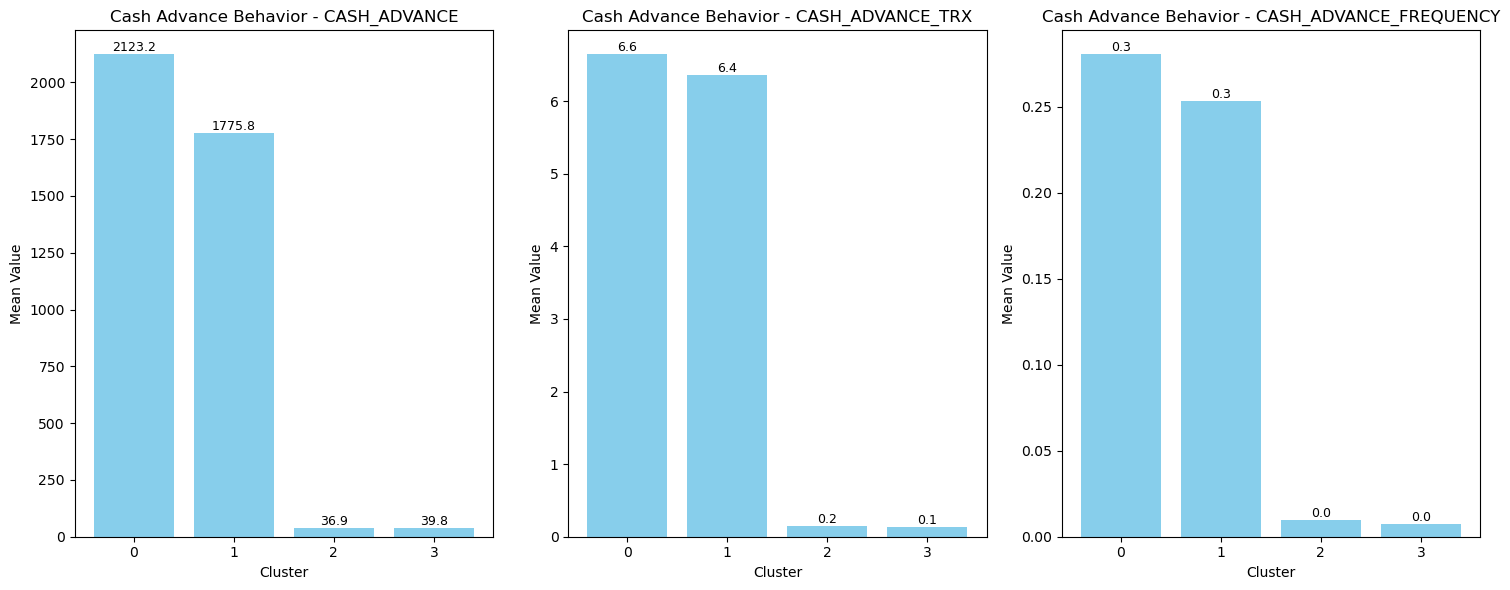

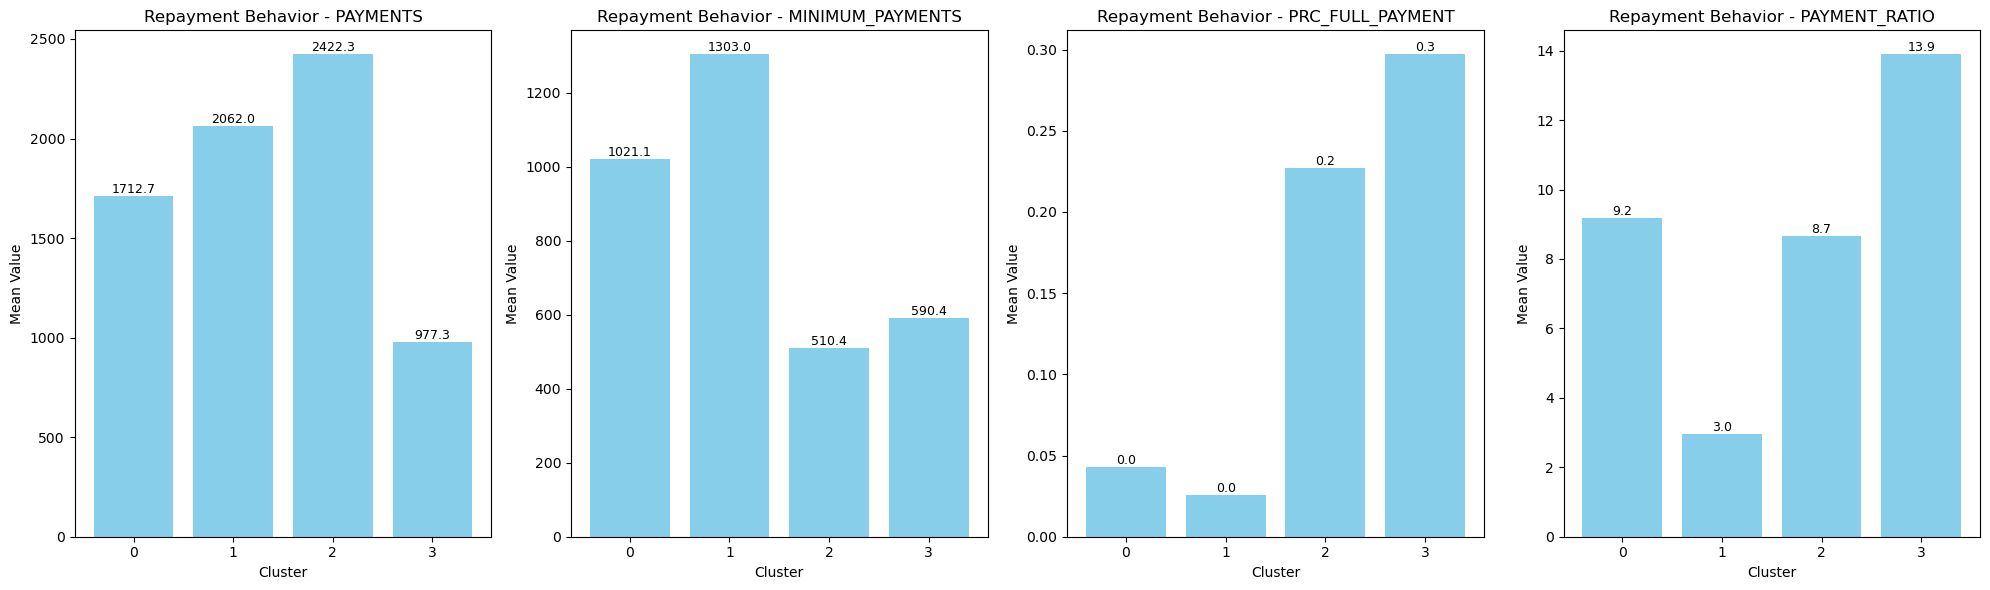

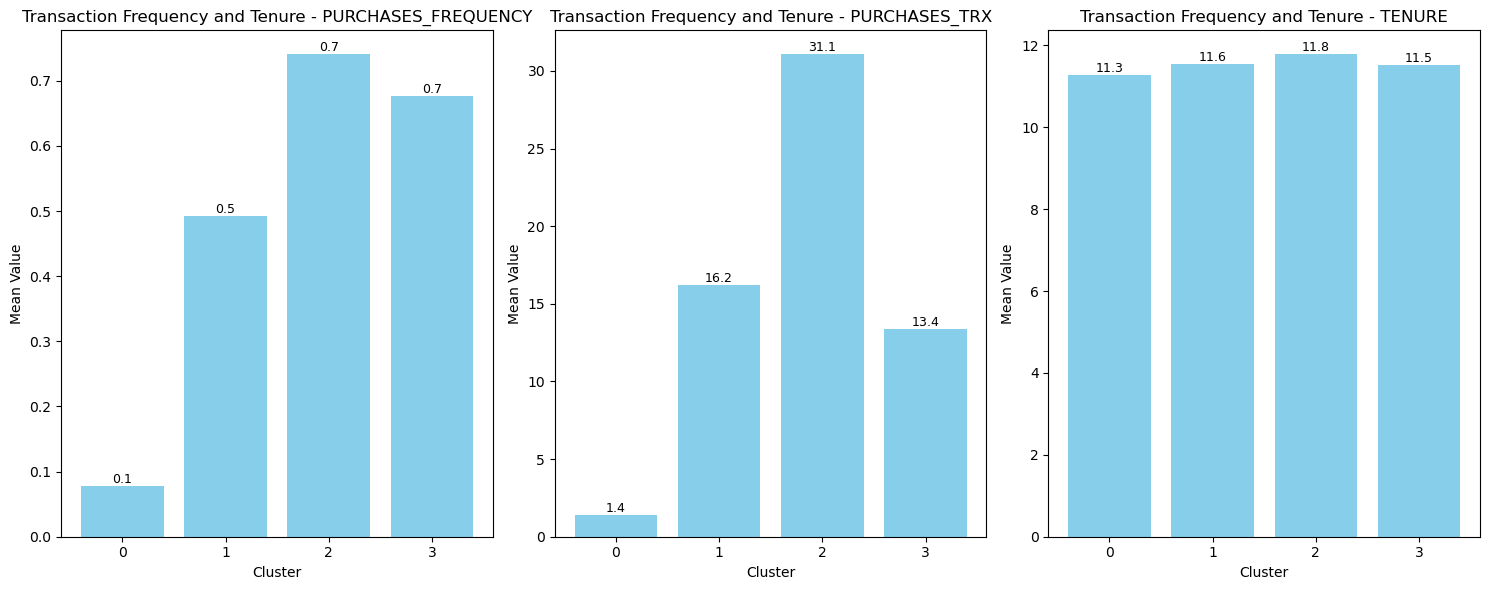

In [53]:
# Define the behavior categories and their corresponding columns
categories = {
    'Balance and Credit Behavior': ['BALANCE', 'CREDIT_LIMIT', 'UTILIZATION_RATIO'],
    'Spending Behavior': ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES'],
    'Cash Advance Behavior': ['CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY'],
    'Repayment Behavior': ['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'PAYMENT_RATIO'],
    'Transaction Frequency and Tenure': ['PURCHASES_FREQUENCY', 'PURCHASES_TRX', 'TENURE']
}

# Loop through categories to create a separate plot for each category
for category, columns in categories.items():
    # Create a new figure for each category
    fig, axes = plt.subplots(1, len(columns), figsize=(5 * len(columns), 6))

    # Ensure axes is 1D (if only one column)
    if len(columns) == 1:
        axes = [axes]

    # Loop through columns and create subplots for each one
    for j, column in enumerate(columns):
        # Plot the bar chart in the appropriate subplot
        ax = axes[j]  # Get the subplot axis
        bars = ax.bar(cluster_profile.index.astype(str), cluster_profile[column], color='skyblue')

        # Annotate each bar with the value
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}', va='bottom', ha='center', fontsize=9)

        # Set the title and labels
        ax.set_title(f'{category} - {column}')
        ax.set_xlabel('Cluster')
        ax.set_ylabel('Mean Value')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()
